# 1 - Perkenalan

#### Nama : Hedy Fernando
#### Batch : 001-HCK
#### Data-Set : ml_datasets.credit_card_default 
#### Objective : Model untuk memprediksi default Payment next month

# Query

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default`

- Seharusnya data diambil berdasarkan tanggal lahir dikali batch online yaitu 15. Tetapi karena data hanya berisi 2965, maka saya sebagai Data Science mengambil keseluruhan data.

# 2 - Import Library

In [59]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [2]:
# Read Dataset with pandas

data = pd.read_csv('ml_datasets.credit_card_default .csv')
pd.set_option('display.max_columns', None)

In [3]:
# Rename Column pay_0 to pay_1

data.rename(columns = {'pay_0':'pay_1', 'default_payment_next_month':
                       'default_payment'}, inplace=True)

Terjadi kesalahan input nama kolom. Kita rubah agar sesuai dengan kolom yang lain.

In [4]:
# Show 5 Top of data

data.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0


In [5]:
# Show 5 bottom of data

data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,-2,379,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Show info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    2965 non-null   int64
 1   sex              2965 non-null   int64
 2   education_level  2965 non-null   int64
 3   marital_status   2965 non-null   int64
 4   age              2965 non-null   int64
 5   pay_1            2965 non-null   int64
 6   pay_2            2965 non-null   int64
 7   pay_3            2965 non-null   int64
 8   pay_4            2965 non-null   int64
 9   pay_5            2965 non-null   int64
 10  pay_6            2965 non-null   int64
 11  bill_amt_1       2965 non-null   int64
 12  bill_amt_2       2965 non-null   int64
 13  bill_amt_3       2965 non-null   int64
 14  bill_amt_4       2965 non-null   int64
 15  bill_amt_5       2965 non-null   int64
 16  bill_amt_6       2965 non-null   int64
 17  pay_amt_1        2965 non-null   int64
 18  pay_amt_

1. Penjelasan untuk data kategori:
    - Sex : 1(male), 2(female).
    - Education Level : 1(graduate school), 2(university), 3(high school), 4(others), 5(unkown), 6(unknown).
    - Marital status : 1(married), 2(single), 3(others).
    - Repayment status(pay_1-6) : 0(pay duly), 1(payment delay for one month), 2(payment delay for two month), dan seterusnya.
    - Default payment : 1(yes), 0(no).
   > Default payment = Gagal bayar atau tidak gagal bayar<br>
   > Gagal bayar yes (diasumsikan pengguna kartu kredit tidak bisa membayar hutang atau sudah tidak membayar)<br>
   > Gagal bayar no (diasumsikan untuk yang masih membayar, kurang membayar, telat bayar tetapi masih melakukan pembayaran)
    

2. Data Numerik : 'limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'

In [7]:
# Show Describe of Central Tendency

data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Pada standard analisis kita dapati bahwa pada bill amount minimalnya terdapat nilai minus, kita tidak tahu apakah customer kelebihan bayar atau ada salah input.Hanya saja untuk data kategori telah di encode.

In [8]:
# Check data duplicated

data.duplicated().sum()

1

Terdapat 1 data duplikat di Data-Set. Kita akan lakukan penghapusan pada data duplikat.

In [9]:
# Drop data duplicated and reset index

duplicat = data[data.duplicated()]
df = data.drop(duplicat.index)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

Data duplikat telah dihapus dan Data-Set telah di reset index.

In [10]:
# Assigning values -1(unknown), -2(unknown) into value 0(pay_duly)

pay_col = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']

for pay_col in pay_col:
    df.loc[:, pay_col] = df.loc[:, pay_col].replace(-1,0)
    df.loc[:, pay_col] = df.loc[:, pay_col].replace(-2,0)

Merubah values dari pay 1 hingga pay 6 , data -1 dan -2 akan dijadikan 0. Kita akan beranggapan bahwa -1 dan -2 adalah bagian dari 0 yang merupakan melakukan pembayaran.

In [11]:
# Check Size Data-Set

df.shape

(2964, 24)

In [12]:
# Check Missing Value

df.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
default_payment    0
dtype: int64

Tidak terdapat Missing Value pada Data-Set.

# 4 - EDA ( Exploratory Data Analysis)

limit_balance Skewness : 1.0006047564306488
limit_balance Kurtosis : 0.6996887055637564


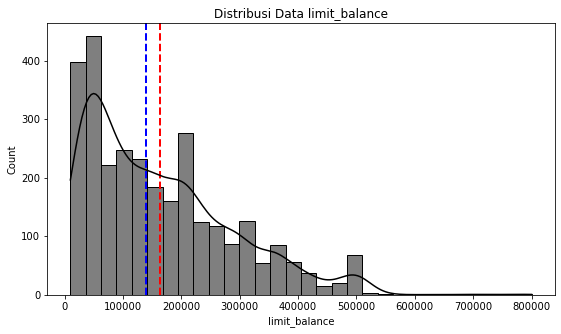



age Skewness : 0.7726317877077615
age Kurtosis : 0.08182141850804969


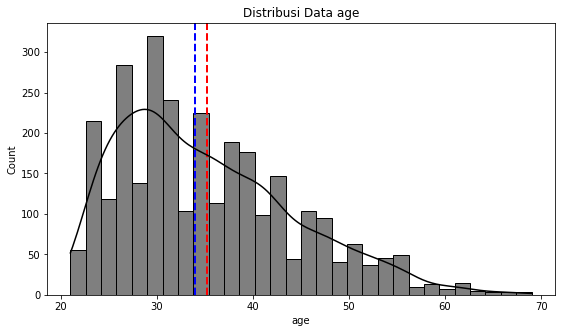



bill_amt_1 Skewness : 2.484229044579796
bill_amt_1 Kurtosis : 8.114813320147675


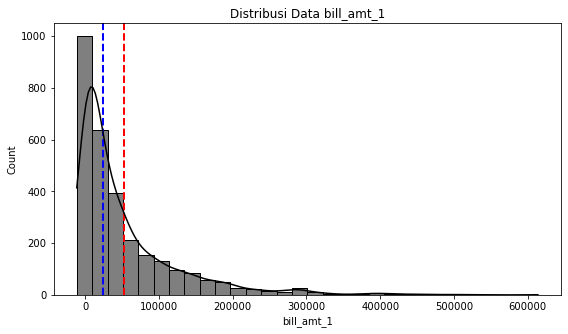



bill_amt_2 Skewness : 2.4579711014121437
bill_amt_2 Kurtosis : 7.688166574363905


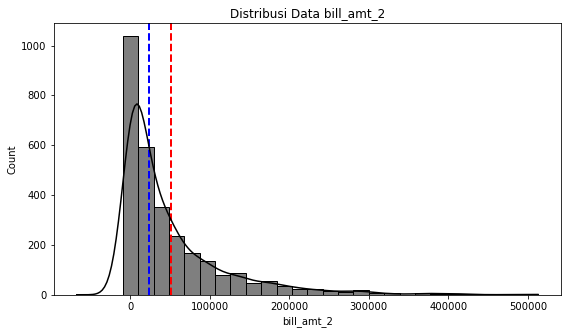



bill_amt_3 Skewness : 2.569558864308388
bill_amt_3 Kurtosis : 8.74999272211309


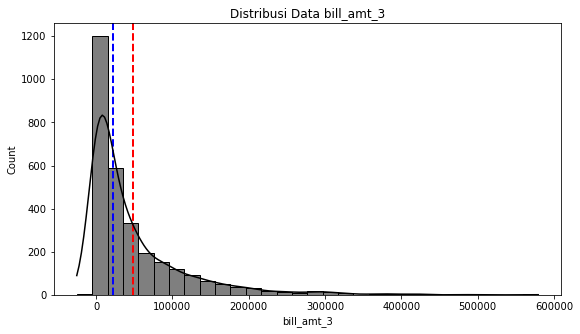



bill_amt_4 Skewness : 2.447791627637353
bill_amt_4 Kurtosis : 7.668929544007444


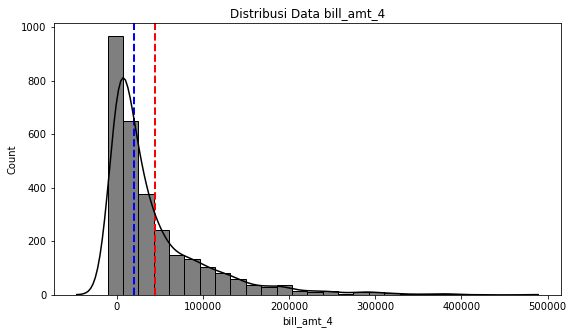



bill_amt_5 Skewness : 2.399943857538142
bill_amt_5 Kurtosis : 7.212404930970752


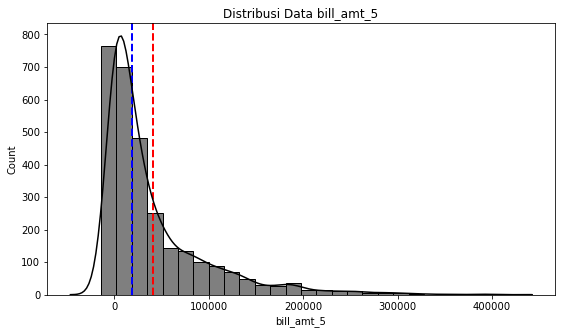



bill_amt_6 Skewness : 2.4319995109017865
bill_amt_6 Kurtosis : 7.575746107546124


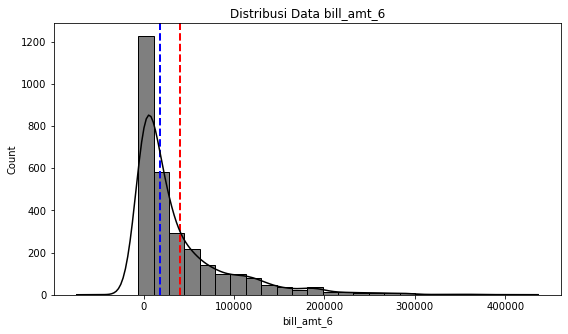



pay_amt_1 Skewness : 11.875902599772312
pay_amt_1 Kurtosis : 192.719301291891


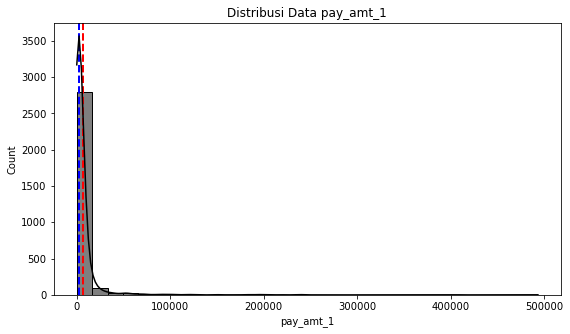



pay_amt_2 Skewness : 29.39979237780383
pay_amt_2 Kurtosis : 1137.9515500745401


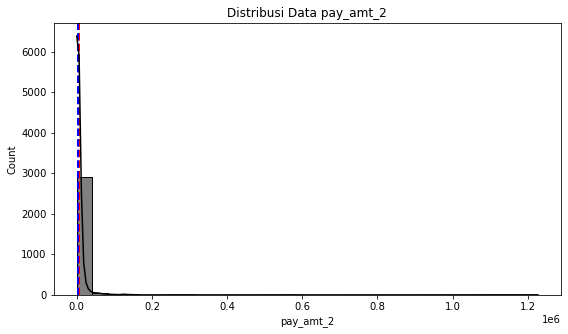



pay_amt_3 Skewness : 8.043463398022954
pay_amt_3 Kurtosis : 81.11087477589079


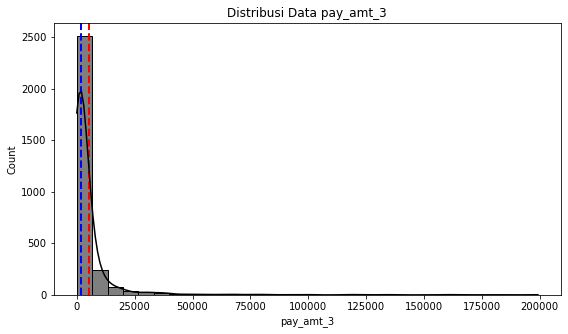



pay_amt_4 Skewness : 8.450287705274073
pay_amt_4 Kurtosis : 89.28295686769208


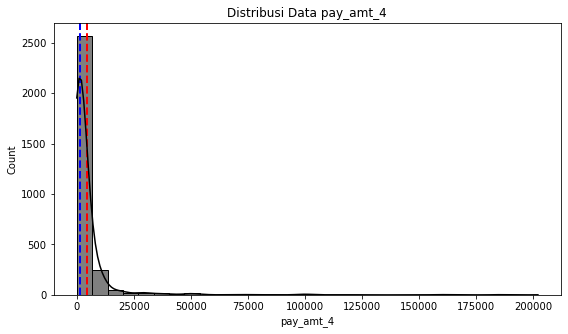



pay_amt_5 Skewness : 11.467169258420286
pay_amt_5 Kurtosis : 178.82169333574734


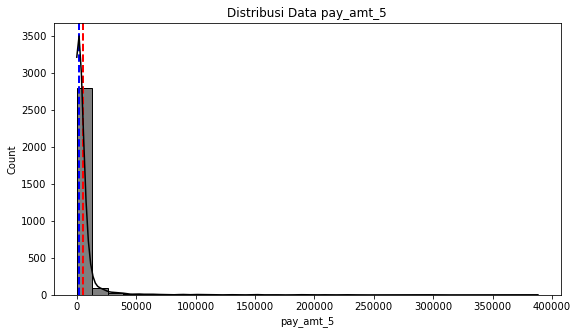



pay_amt_6 Skewness : 9.758714356332971
pay_amt_6 Kurtosis : 143.26778233538778


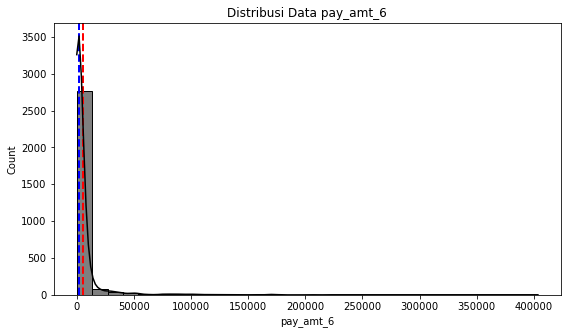

In [13]:
# Create Histogram Distribution

dat_num = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

for col in dat_num:
    print(df[col].name + ' Skewness :',df[col].skew())
    print(df[col].name + ' Kurtosis :',df[col].kurt())
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='blue', linestyle='dashed', linewidth=2)
    plt.title('Distribusi Data ' + data[col].name)
    sns.histplot(df[col], bins=30, kde=True, color='black')
    plt.show()
    print('\n')

Data numerik pada Data-Set semuanya Right Skew, artinya terdeteksi outliers atau ada nilai data yang terlampau jauh dari rata-rata nilai data keseluruhan. Hal ini akan ditinjau kembali apakah akan dilakukan pembersihan outliers atau tidak, jika proses penghapusan berpengaruh dengan model, maka tidak akan dilakukan pembersihan.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


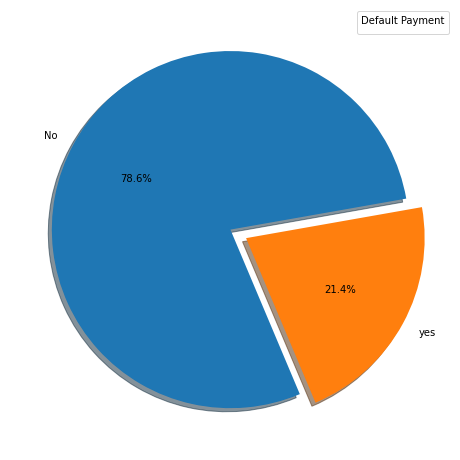

In [14]:
# Create pie chart Target

labels = 'No', 'yes'
explode = (0.0, 0.1)

plt.figure(figsize=(8,10))
plt.legend(title = "Default Payment")
plt.pie(df['default_payment'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10)
plt.show()

Dilihat dari grafik, adanya data imbalance di target. Dimana jumlah yang gagal bayar kartu kredit hanya 21,4 % dari keseluruhan data, berbanding jauh dengan yang tidak terkena gagal bayar sejumlah 78,6%.

In [15]:
# Create fungsi graphcount for countplot

def graphcount(x):
    plt.figure(figsize=(25,20))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=25)
    plt.rcParams.update({'font.size': 25})
    sns.countplot(x=x, hue='default_payment', data=df)

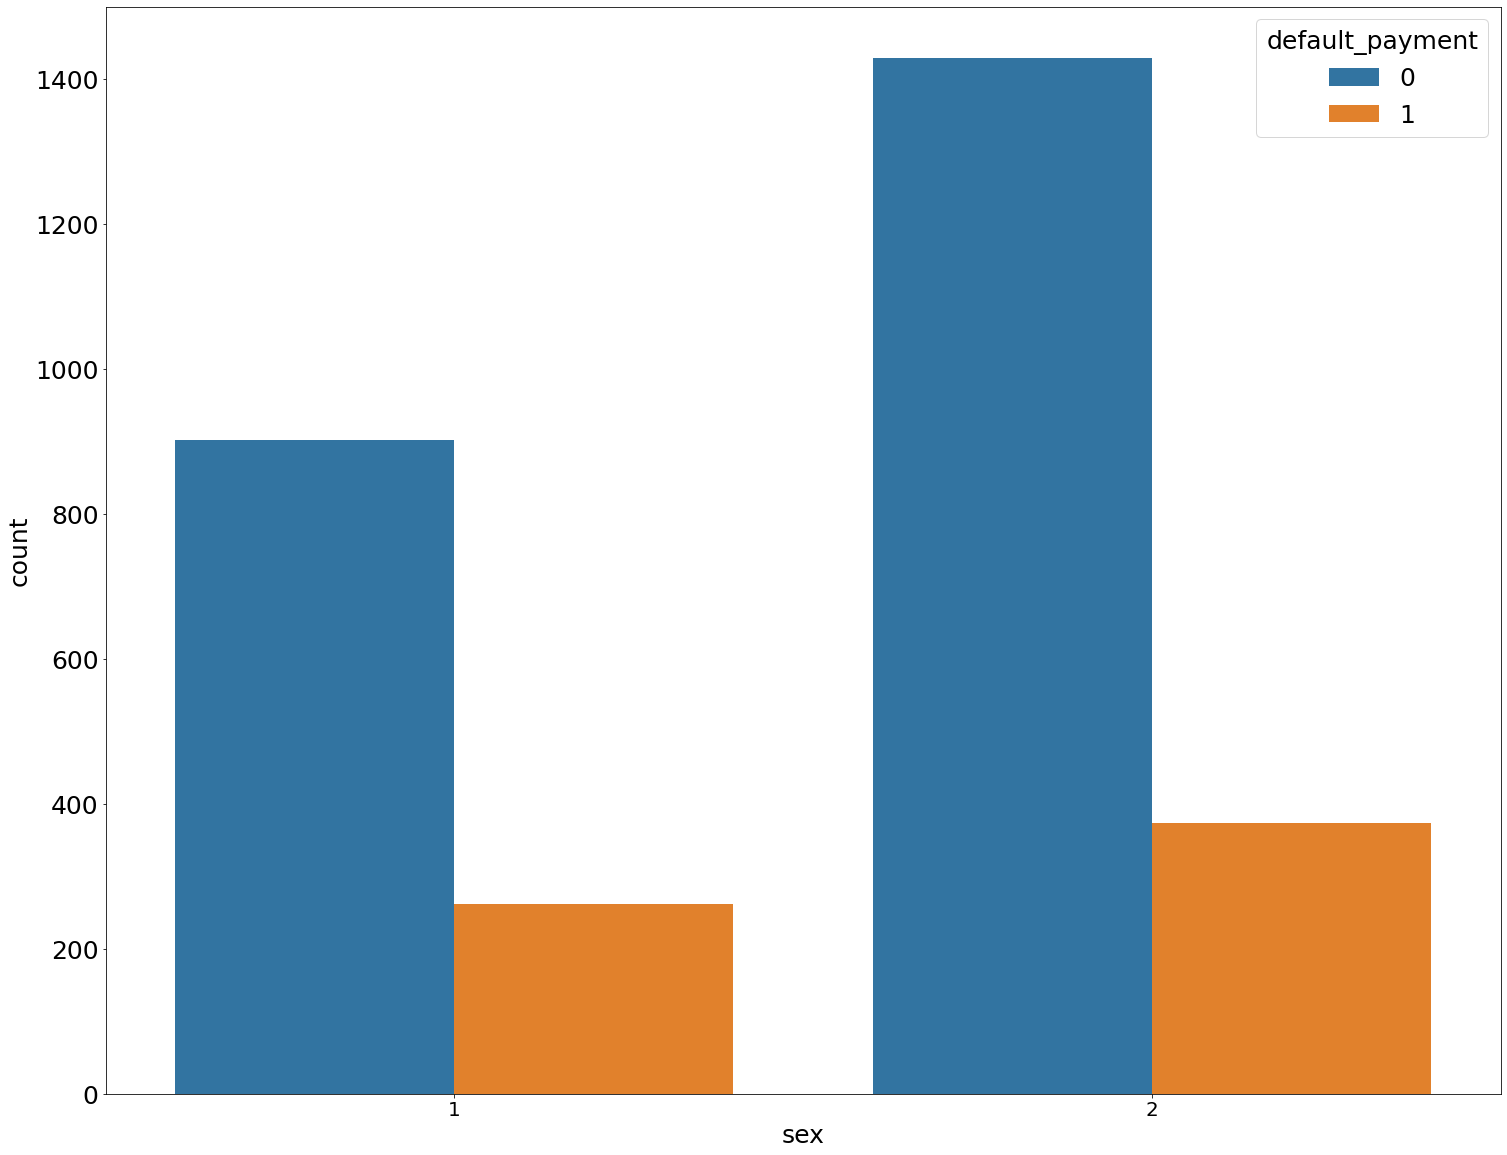

In [16]:
# Create plot count of gender

graphcount('sex')

Jika dilihat berdasarkan gender, persebaran data cukup merata antara yang gagal bayar ataupun tidak pada perempuan dan laki-laki. Dari grafik kita juga mengetahui bahwa perempuan memiliki jumlah data yang dominan, ini menandakan perempuan lebih banyak menggunakan kartu kredit.

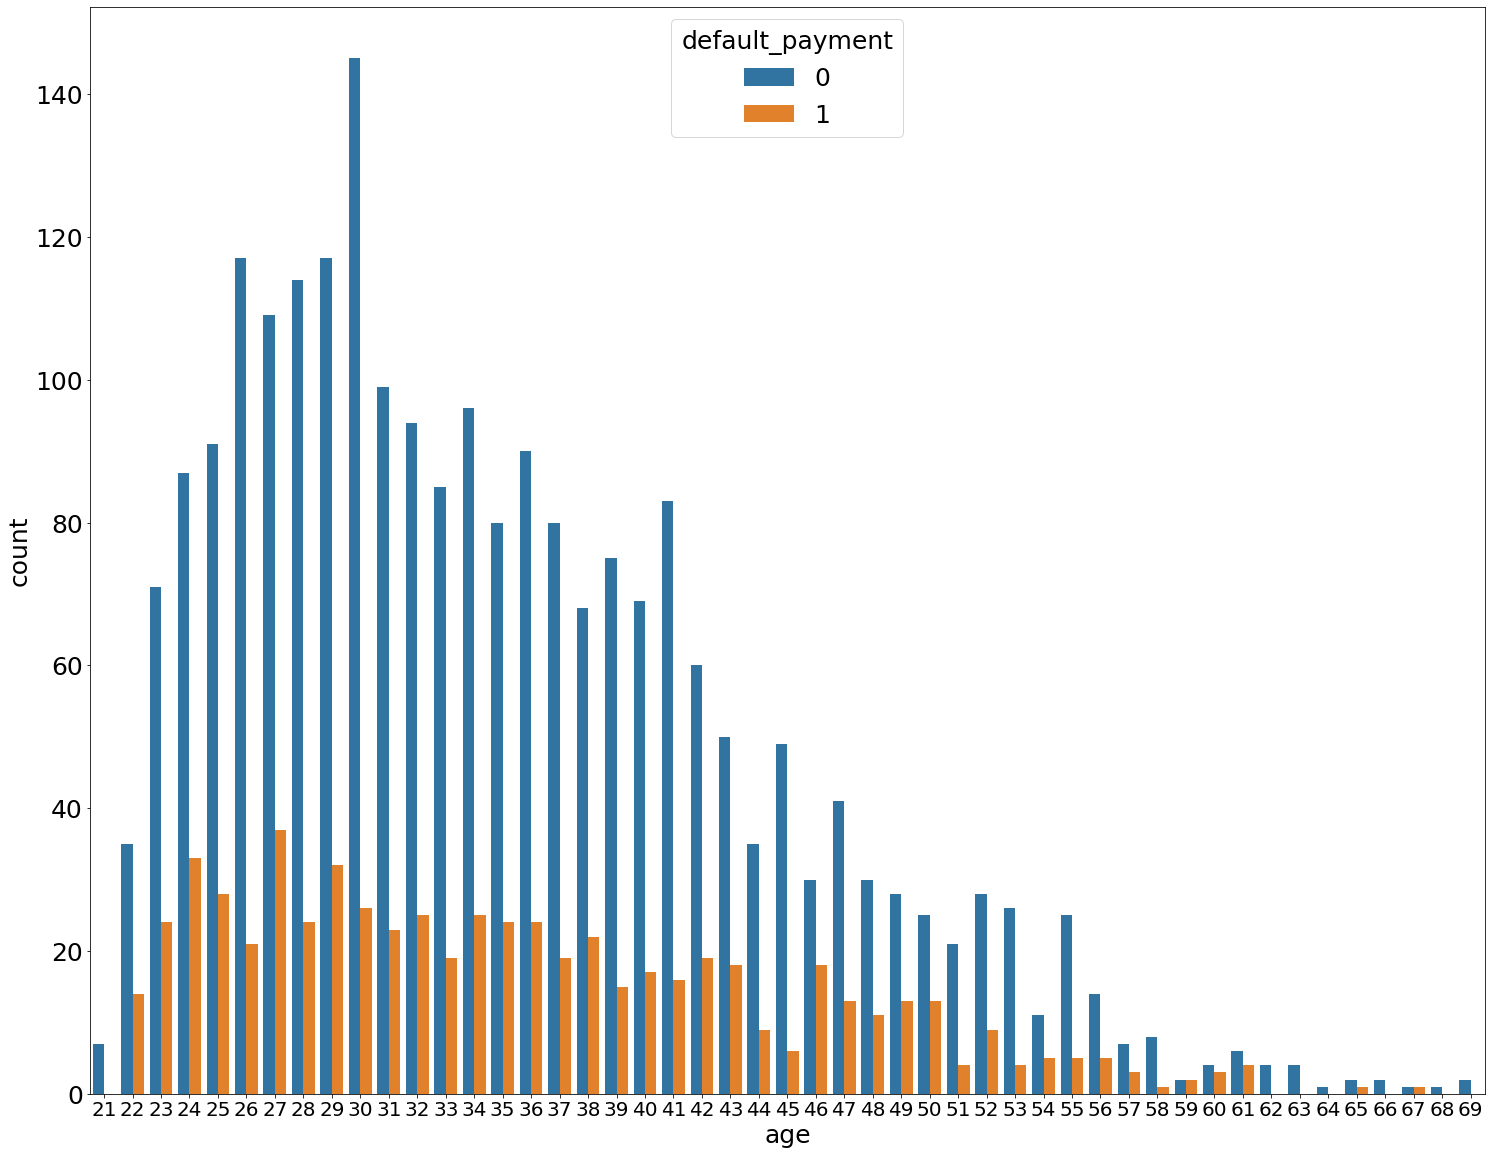

In [17]:
# Create plot count of age

graphcount('age')

Pada grafik kategori umur, persebaran data pengguna kartu kredit tertinggi ada di kisaran umur terbilang muda dan tertinggi ada di umur 30 tahun. Untuk yang gagal bayar kartu kredit tertinggi ada di umur 27 tahun. Untuk orang yang sudah berumur tua kisaran 58 tahun ke atas, pengguna kartu kredit sangatlah sedikit.

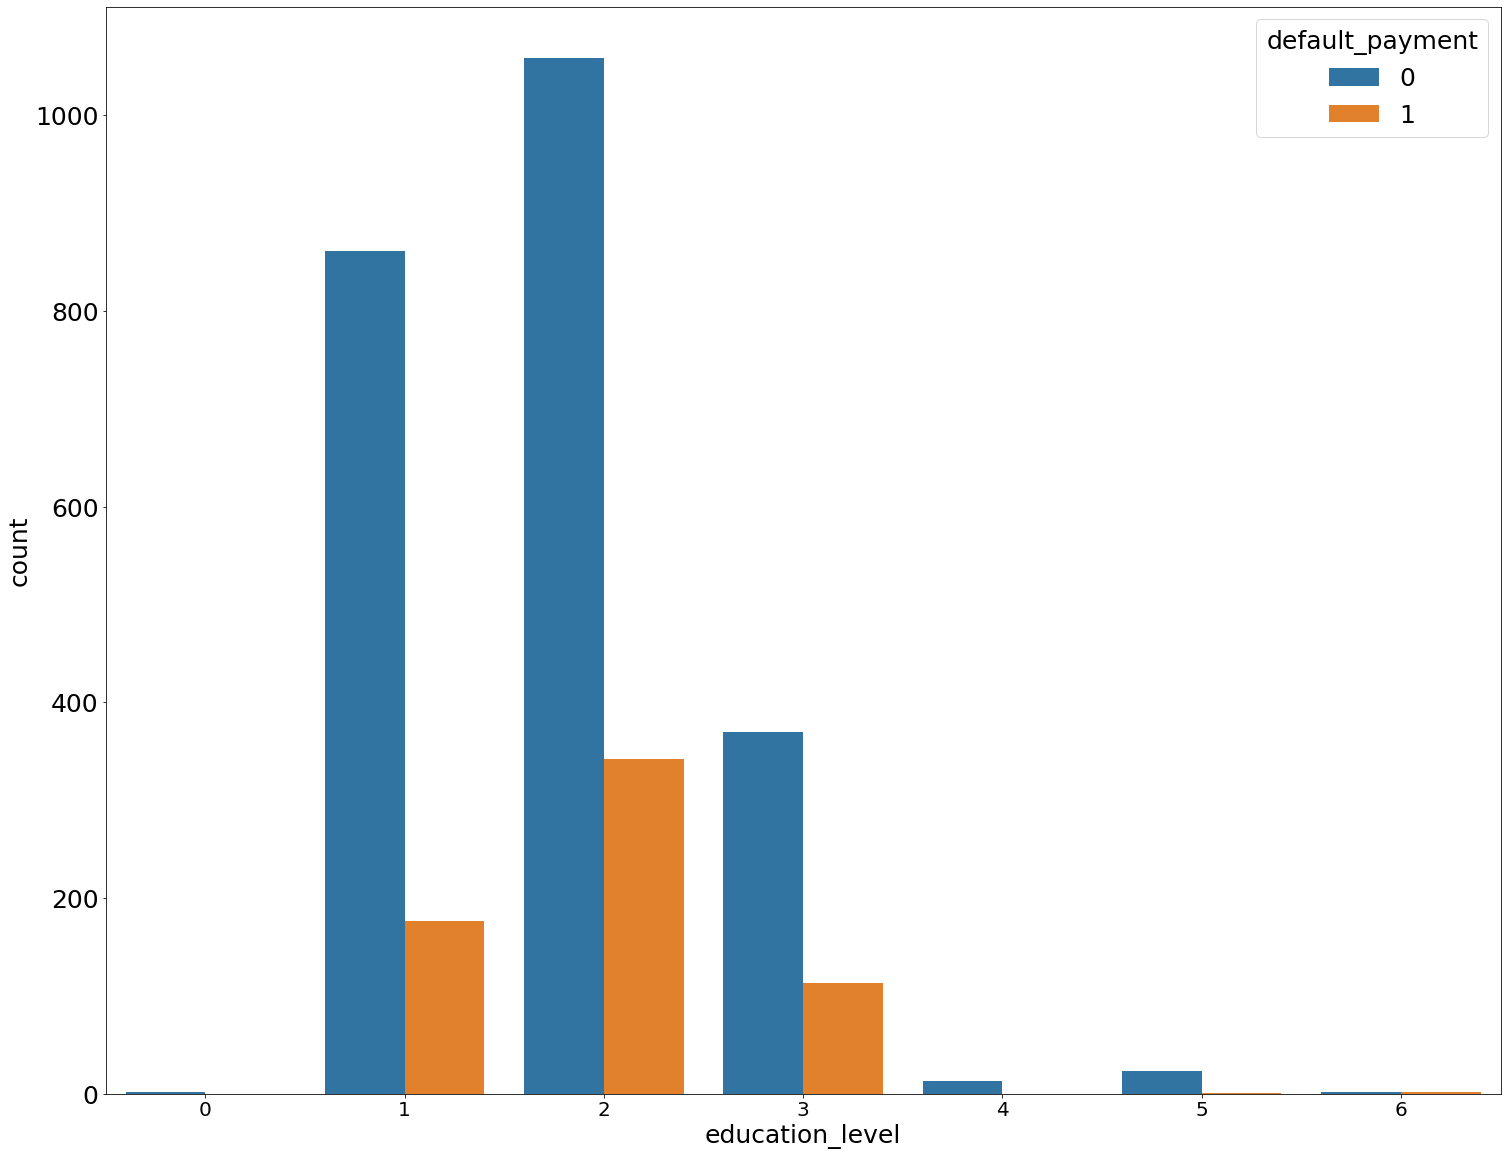

In [18]:
# Create plot count of Education Level

graphcount('education_level')

Grafik di atas memberikan informasi bahwa pengguna kartu kredit tertinggi ada di tingkat universitas dengan gagal bayar yang juga tinggi, pengguna tertinggi kedua ada di tingkat lulusan sekolah dan yang terakhir di tingkat sekolah menengah atas. Informasi ini sesuai dengan rata-rata umur pengguna aktif kartu kredit. Perusahaan kartu kredit bisa menyeleksi kembali untuk pengguna kartu kredit, karena pengguna kartu kredit banyak di kalangan bukan pekerja sehingga sangat riskan terjadinya gagal bayar.

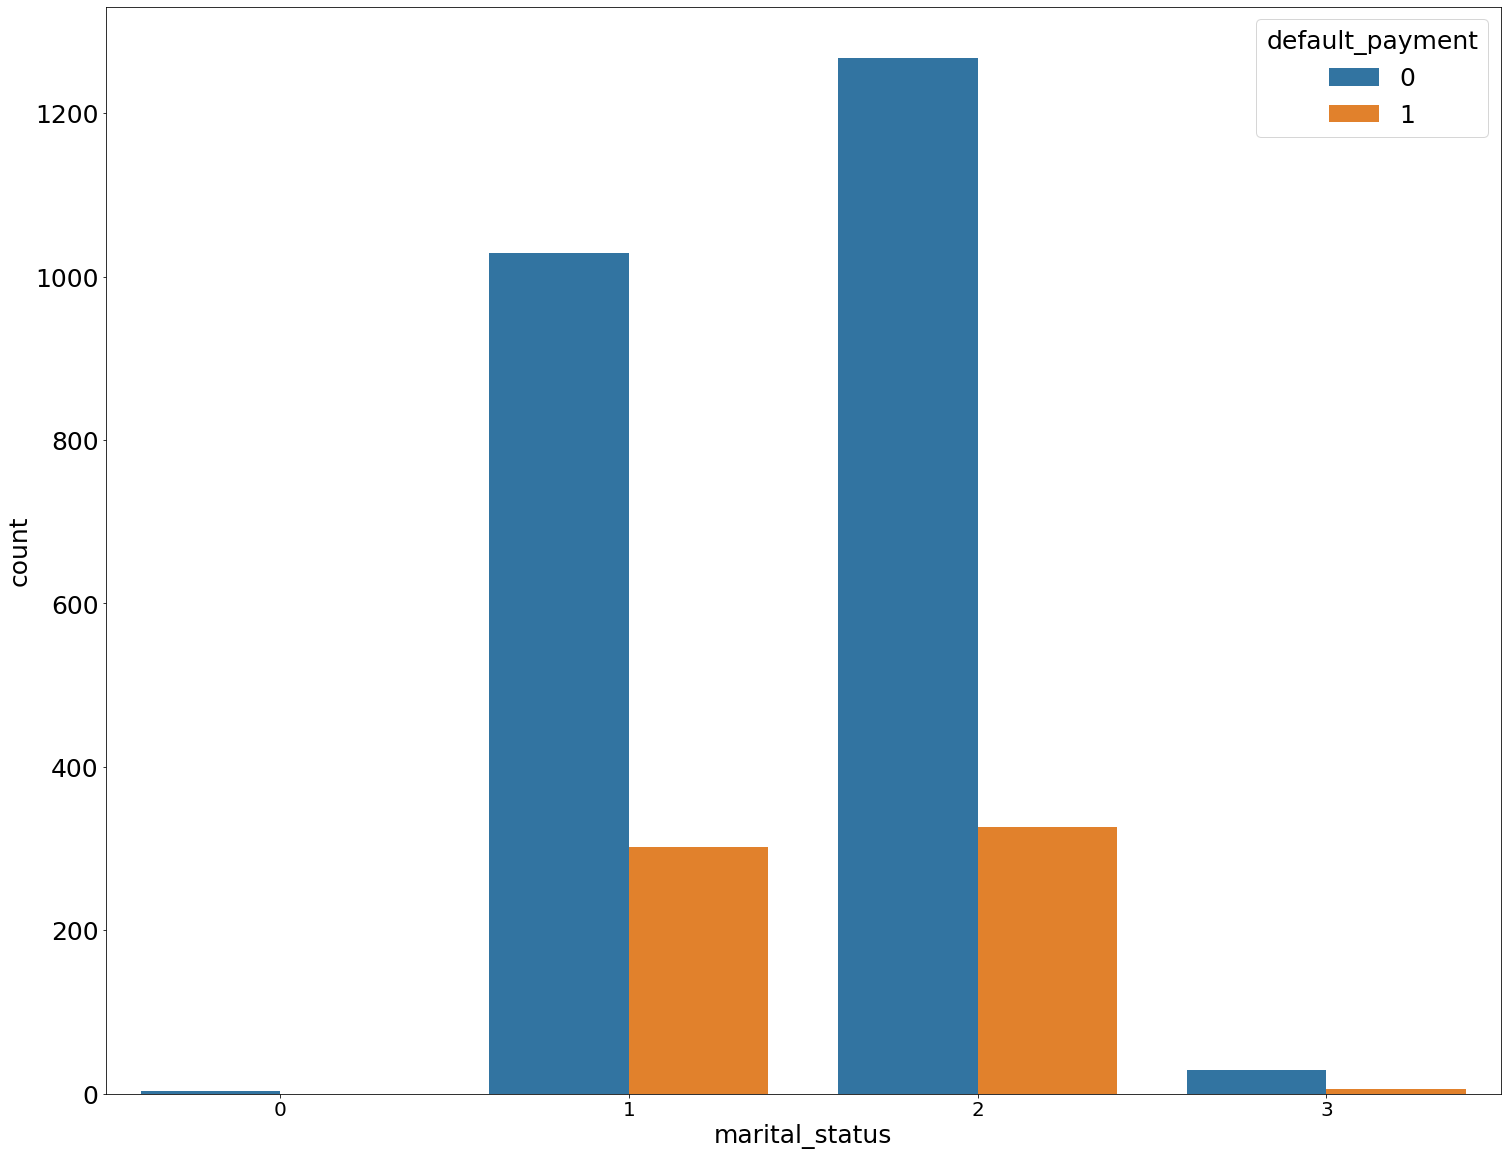

In [19]:
# Create plot count of gender

graphcount('marital_status')

Pengguna kredit paling banyak secara total adalah orang yang masih single. Untuk yang gagal bayar antara yang berkeluarga dan single secara grafik setara. 

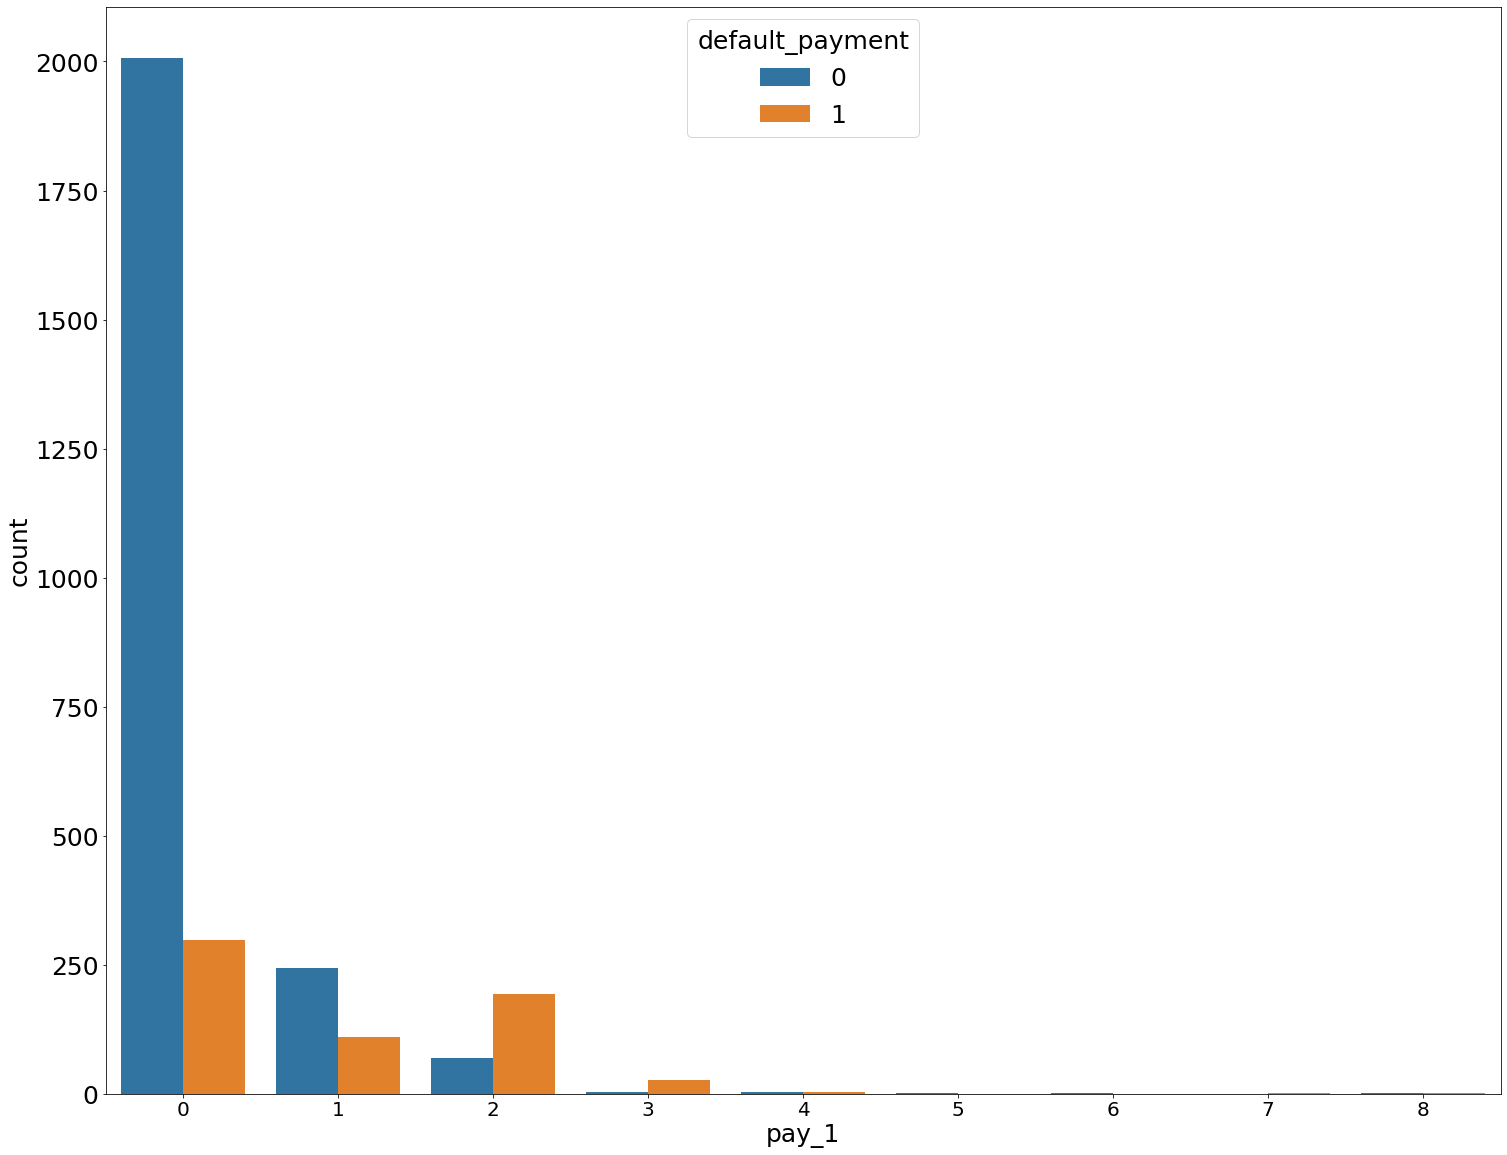

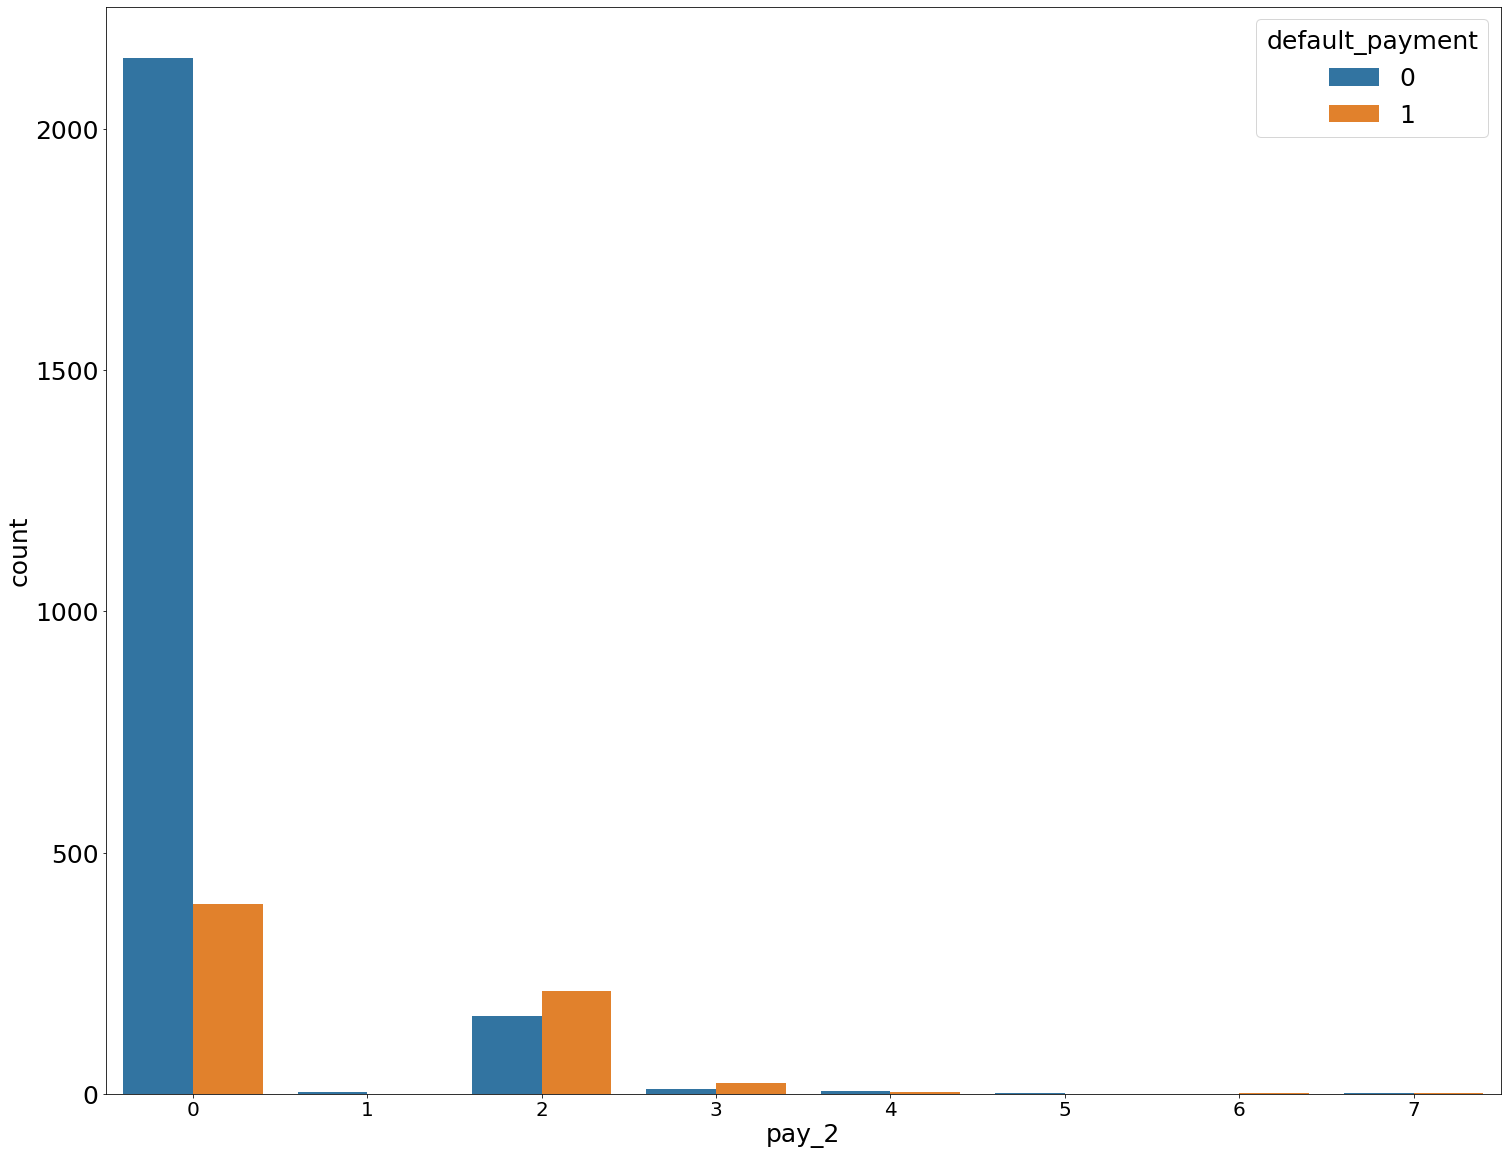

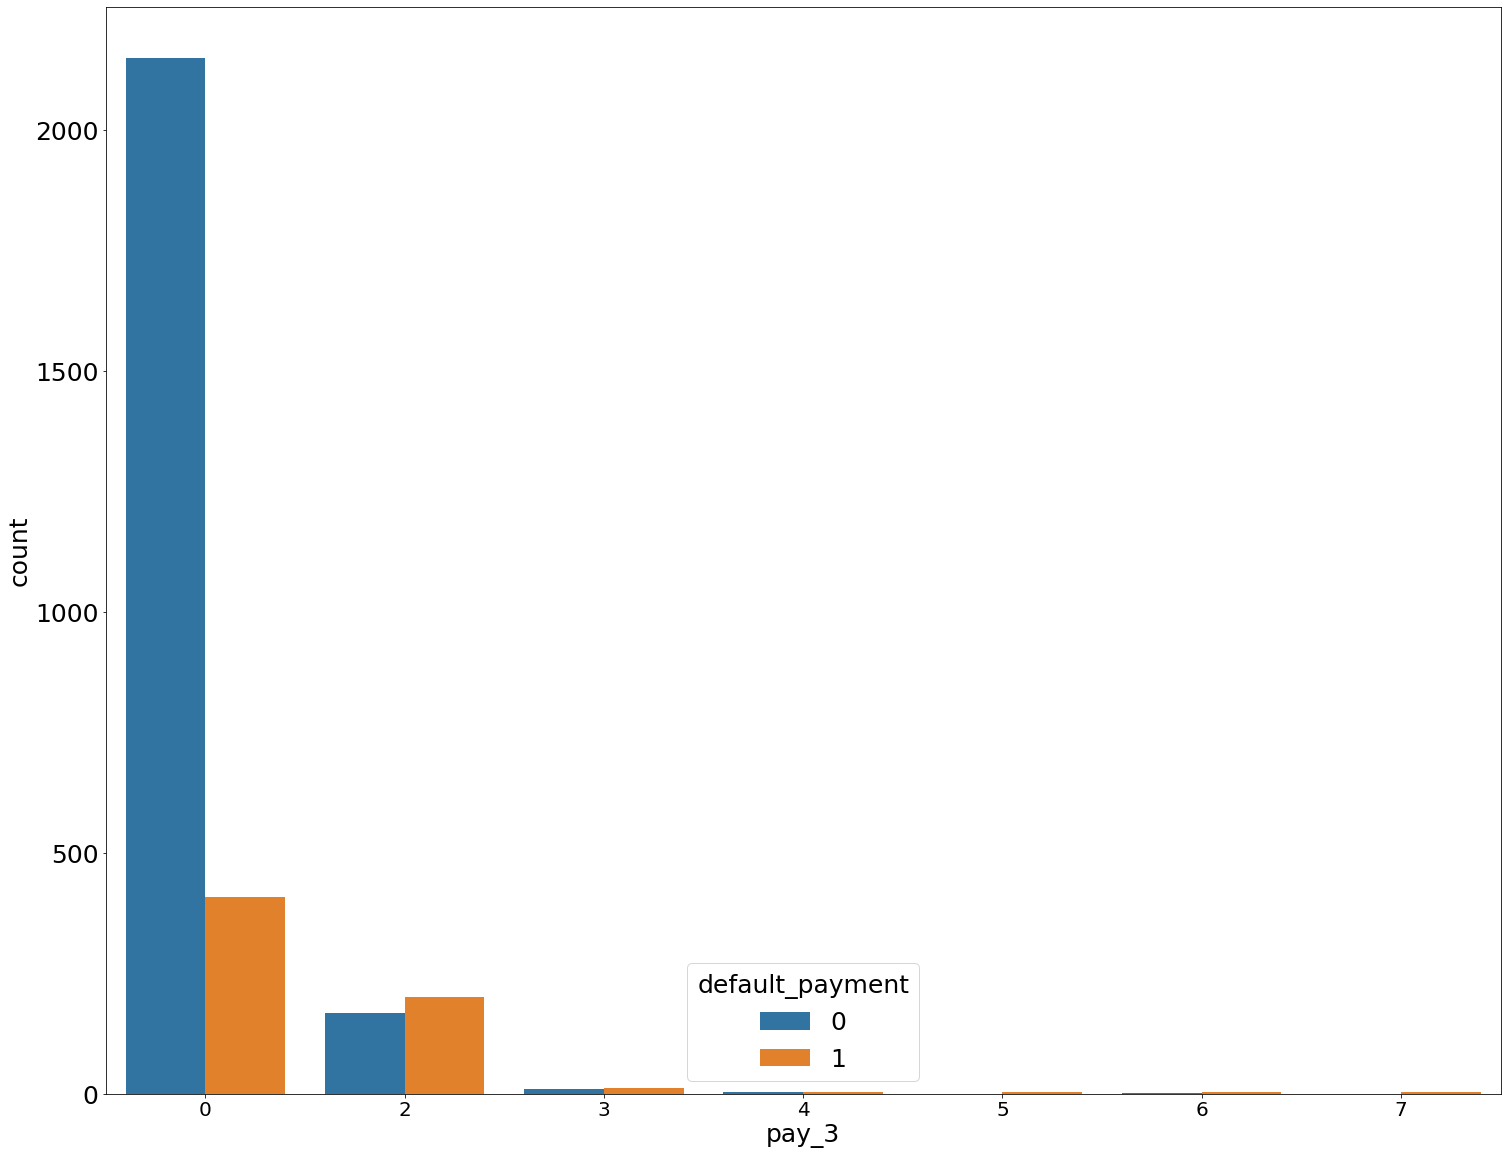

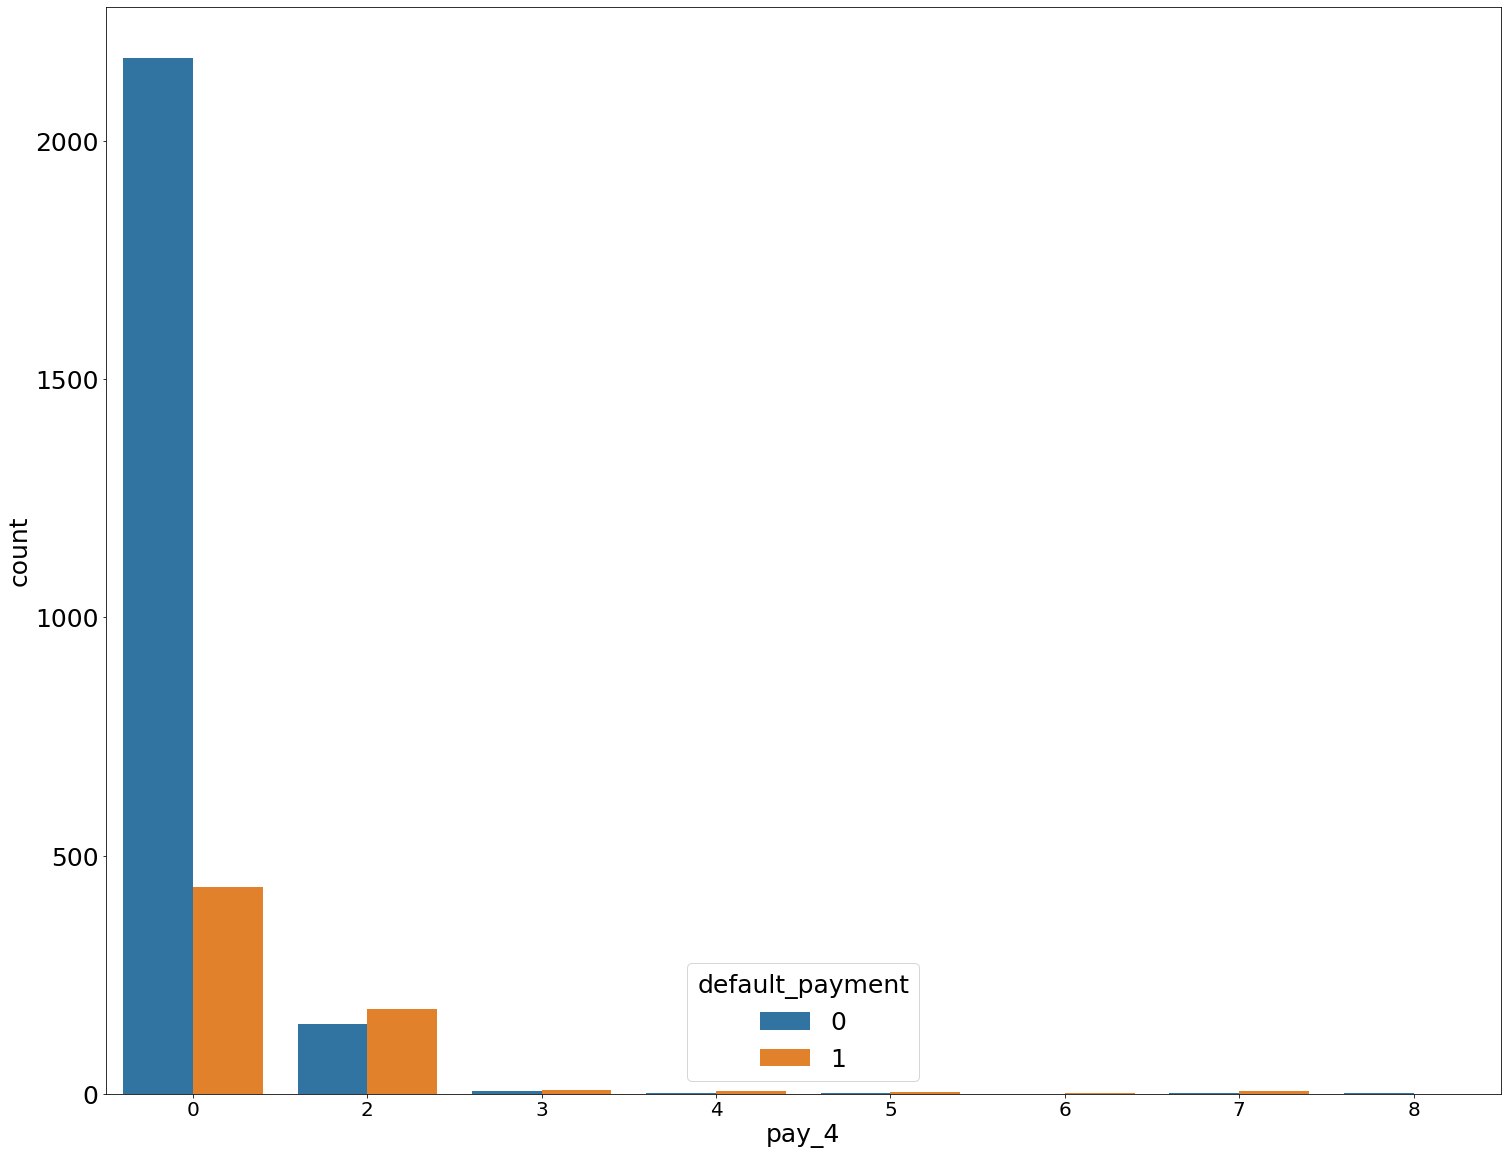

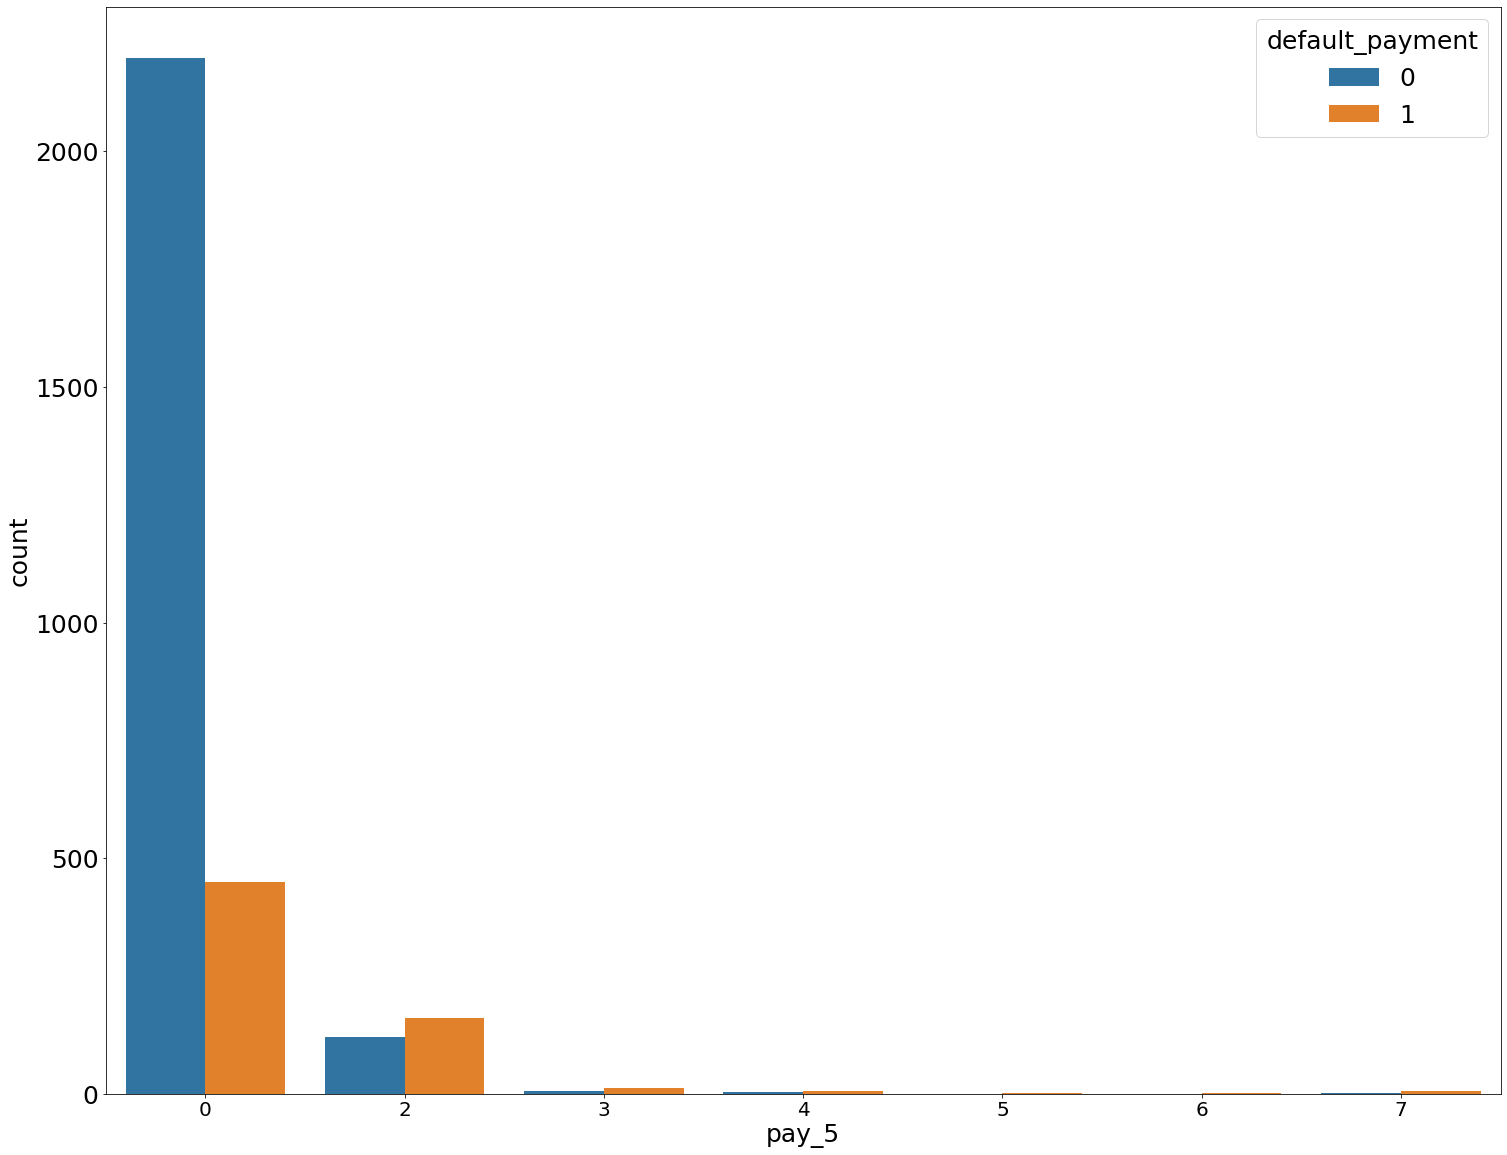

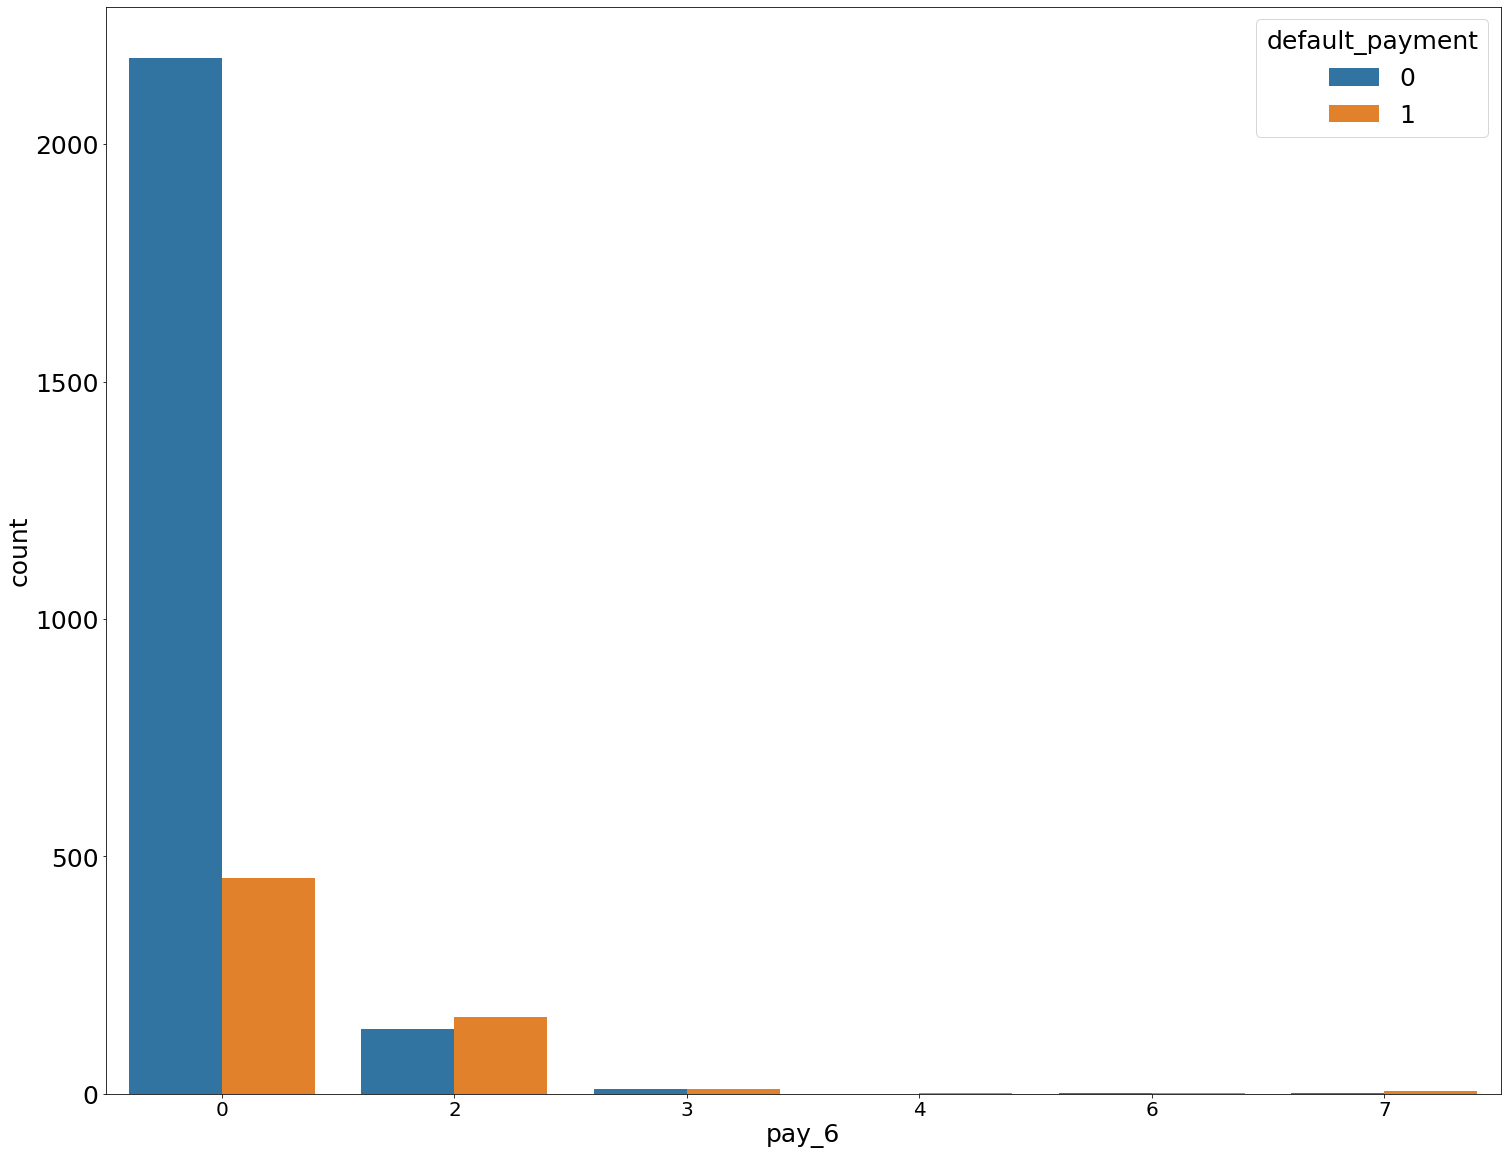

In [20]:
# Create plot count of Repayment status

paycol = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6',]
for paycol in paycol:
    graphcount(paycol)


- Gagal bayar banyak terjadi karena pembayaran tidak dilakukan di jadwal semestinya ataupun meningkatnya jumlah hutang kartu kredit. Tetapi jumlah yang gagal bayar tanpa ada telat bulan lebih banyak dibandingkan yang menunggak.
- Kita juga ketahui dari grafik pembayaran kedua banyak penumpukan yang terlambat bayar selama 2 bulan. Bahkan jumlah yang tidak gagal bayar dan gagal bayar untuk yang telat 2 bulan juga meningkat setiap bulannya. bisa diasumsikan bahwa customer meningkatkan jumlah hutangnya sehingga terjadi telat bayar.
- Untuk yang membayar sesuai dengan ketentuan perusahaan, cukup stabil setiap bulannya. Bisa kita asumsikan bahwa client yang cukup bayar kemungkinan client yang sama yang sudah bekerja.

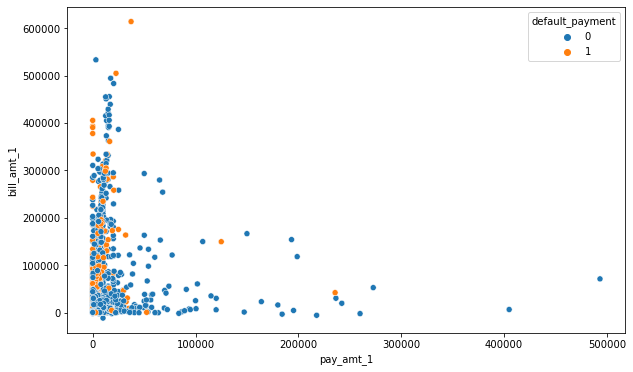

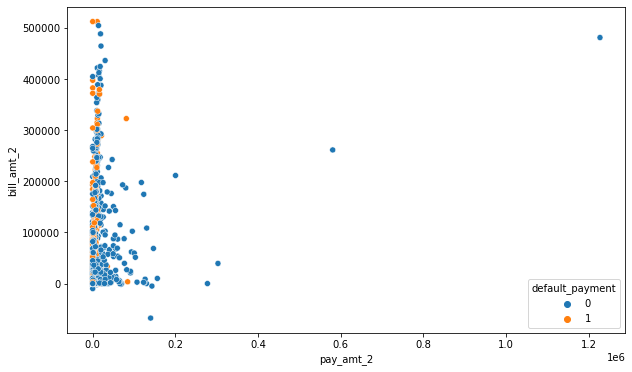

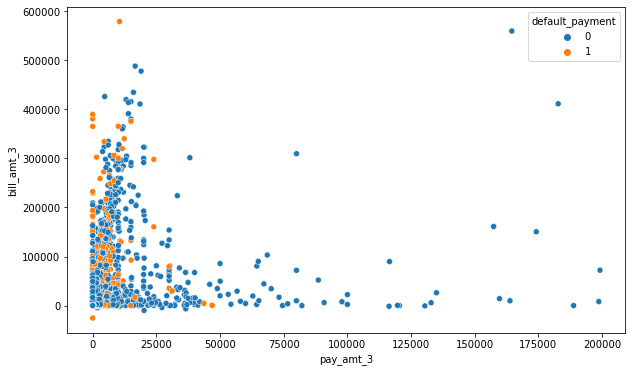

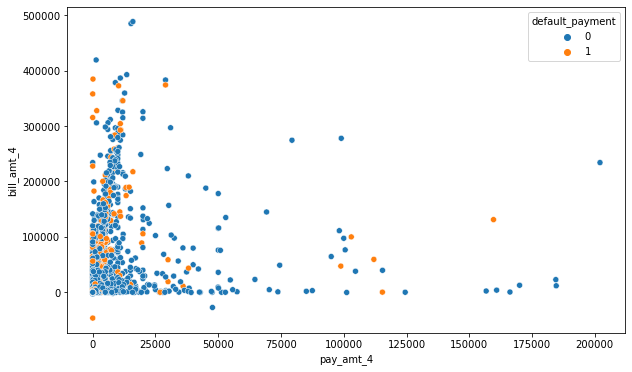

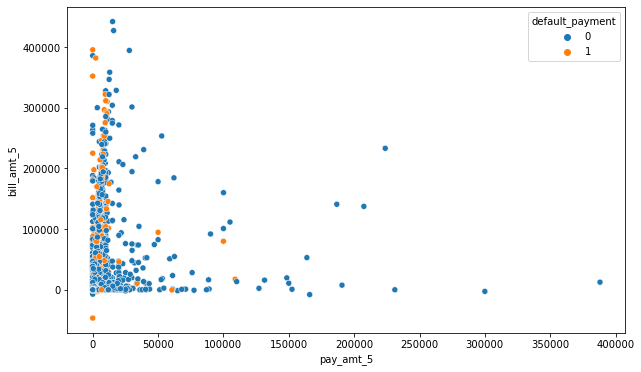

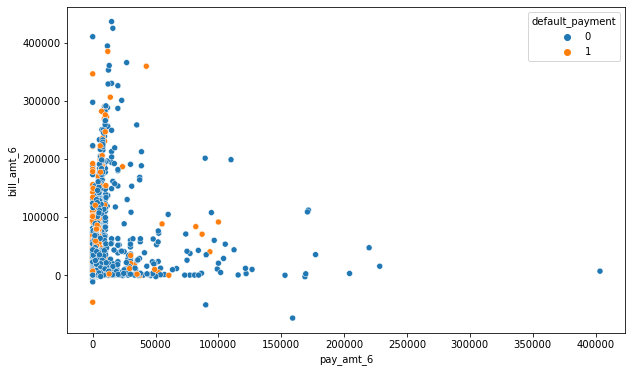

In [21]:
# Creater fungsi scatter

def skater(i,j):
    plt.figure(figsize=(10,6))
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    plt.rcParams.update({'font.size': 10})
    sns.scatterplot(x=i, y=j, hue='default_payment', data=df)
    
skater('pay_amt_1','bill_amt_1')
skater('pay_amt_2','bill_amt_2')
skater('pay_amt_3','bill_amt_3')
skater('pay_amt_4','bill_amt_4')
skater('pay_amt_5','bill_amt_5')
skater('pay_amt_6','bill_amt_6')

Tidak terdapat pola pada bill total hutang ataupun jumlah yang telah dibayarkan. Informasi yang bisa kita dapatkan bahwa banyak customer yang hutang kreditnya meningkat dari semestinya dengan total bill kredit yang cenderung tinggi. Jika kita lihat banyak yang gagal bayar di jangkauan total bill 50.000 - 400.000. Ada kemungkinan terjadi gagal bayar karena menunggak atau adanya peningkatan hutang.

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment']


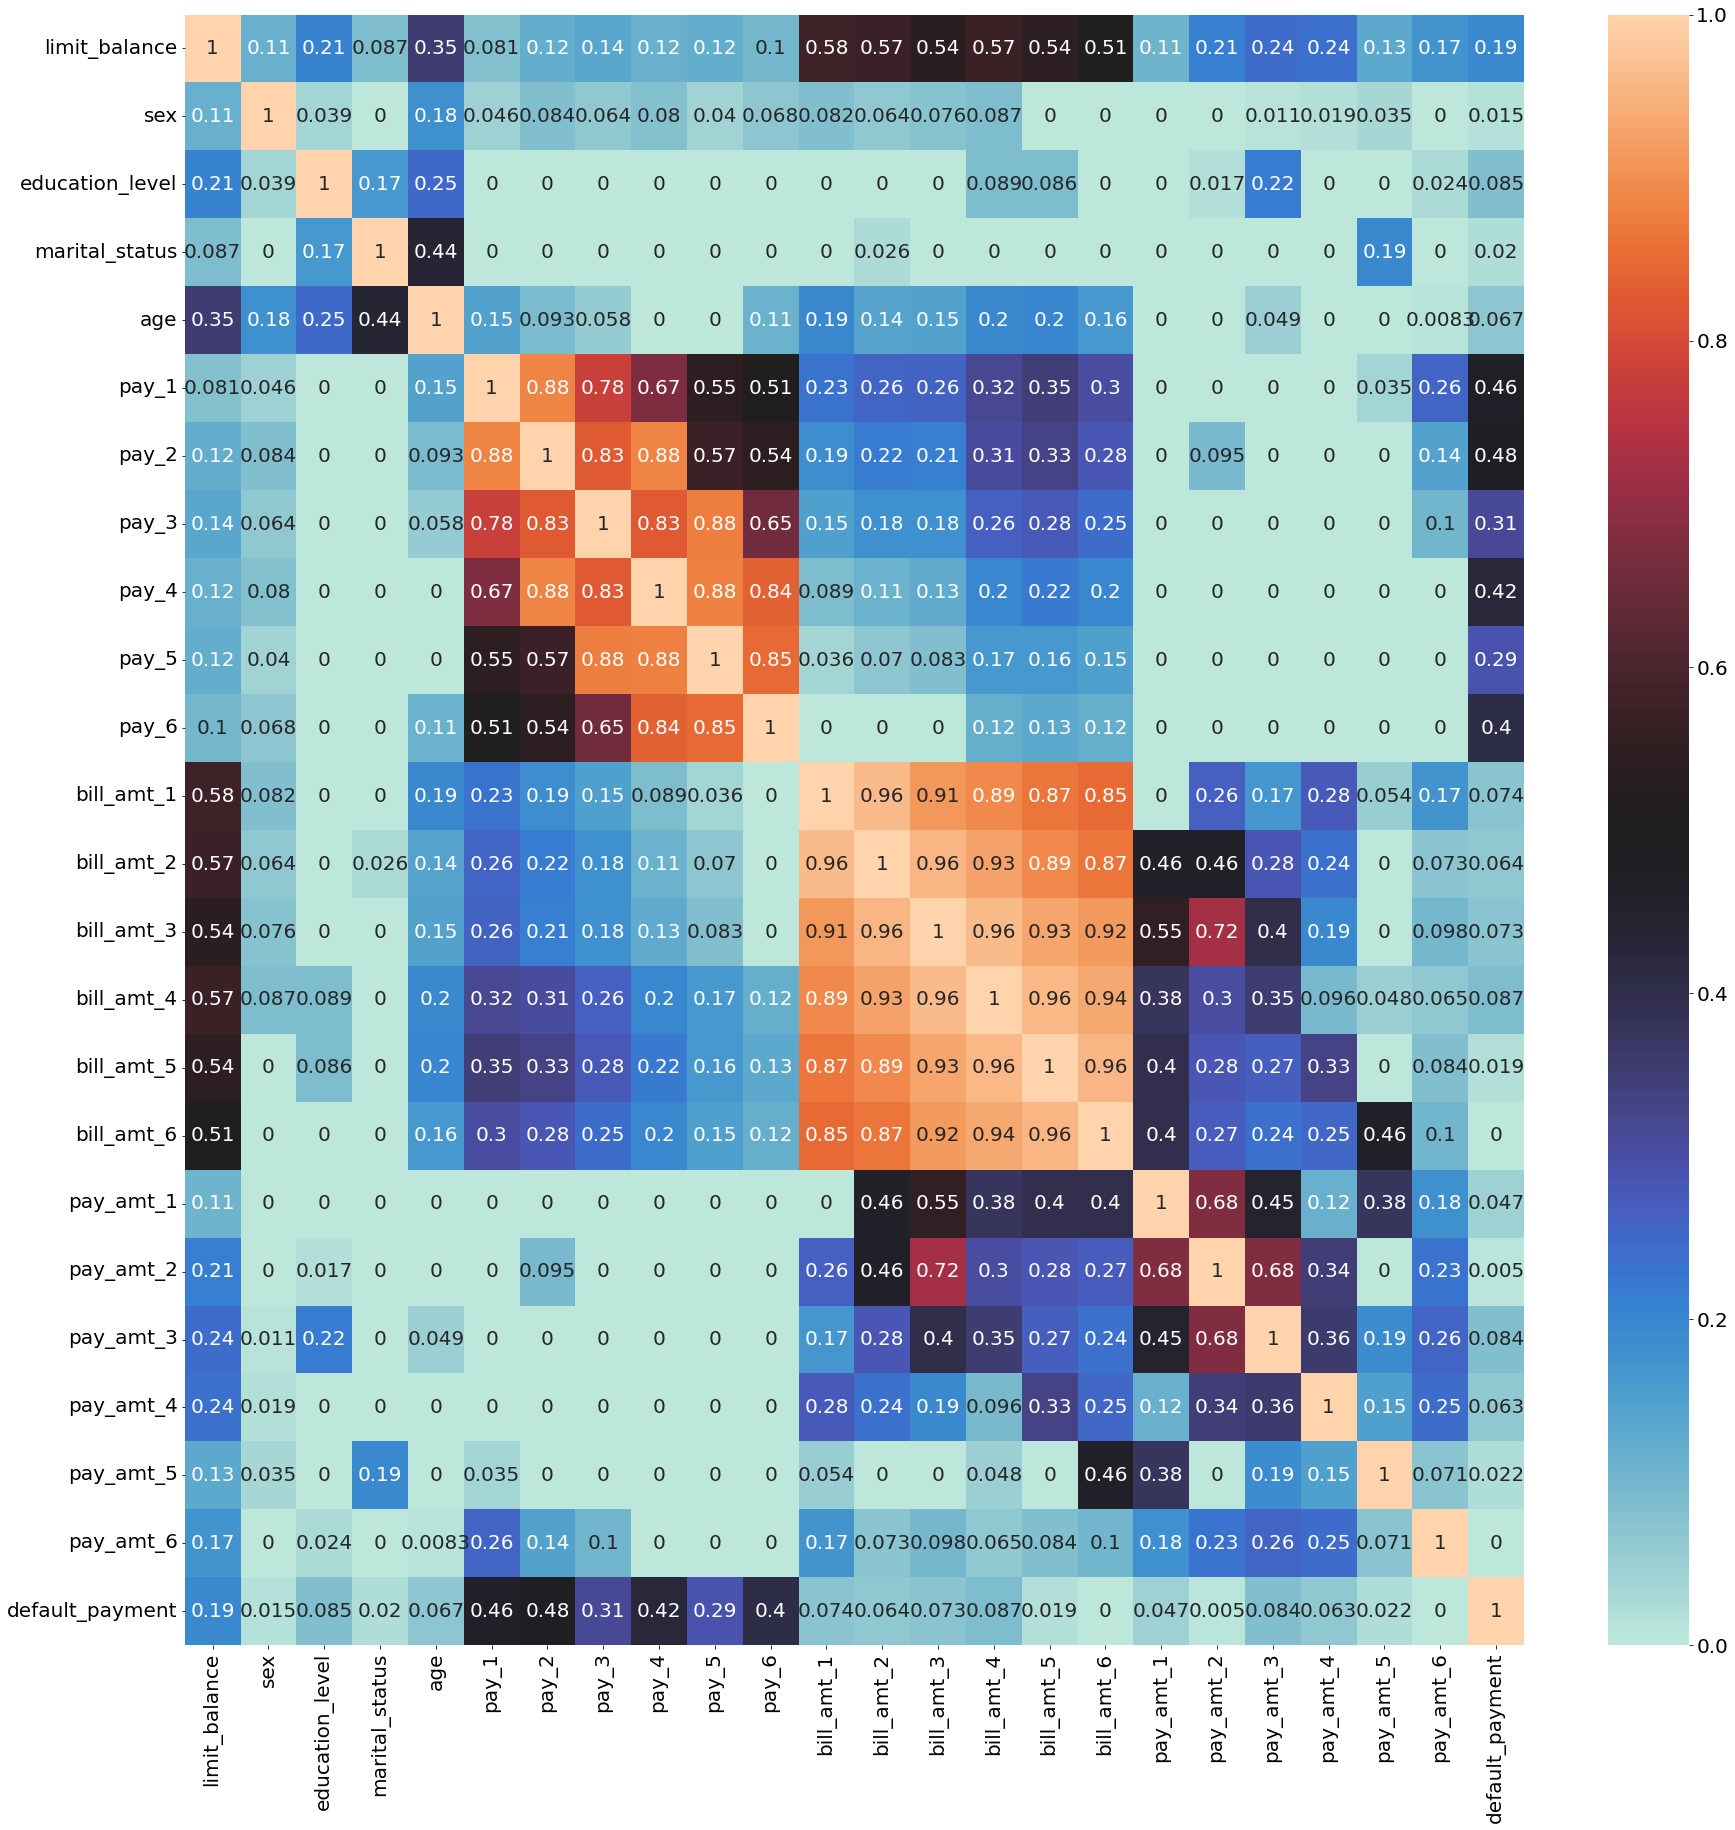

In [22]:
# Check correlation with phik heatmap

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(30,30))
sns.heatmap(df.phik_matrix(), vmin=0, vmax=1, annot=True, cmap='icefire');

Hubungan antara kolom dengan target sangatlah lemah, hanya pada kolom pay 1, pay 2 , pay 4 dan pay 6 yang memiliki skor sampai dengan 4.

# 5 - Data Preprocessing

### Data Inference

In [23]:
# Get Data for Data Inference

df_inf = df.sample(10, random_state=17)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
91,420000,2,2,2,32,0,0,0,0,0,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
325,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
47,40000,2,3,1,60,0,0,0,0,0,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
2847,110000,1,1,2,34,0,0,2,0,0,0,15908,18873,890,3420,4309,733,4013,2,3430,4319,2,1905,0
446,60000,2,2,2,24,0,0,0,0,0,0,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0
567,300000,2,1,1,30,0,0,0,0,0,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
1639,70000,2,1,1,36,1,2,2,0,0,2,18514,19913,19310,20021,22175,21680,2000,0,1339,2493,0,792,1
548,490000,2,2,1,30,0,0,0,0,0,0,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
2163,150000,2,2,1,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2476,290000,1,2,1,43,0,0,2,0,0,0,172,1930,1752,3710,3848,4285,1930,0,2000,200,500,0,0


In [24]:
# Remove Inference-Set from Dataset

df_tr_ts = df.drop(df_inf.index)
df_tr_ts

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,210000,2,2,1,39,0,0,0,0,0,0,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2960,280000,2,1,1,41,2,0,0,0,0,0,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2961,80000,1,1,2,28,1,0,0,0,0,0,0,47,207,0,0,0,47,207,0,0,0,0,0
2962,200000,1,2,1,53,1,0,0,0,0,0,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


In [25]:
# Reset Index  Data Inference

df_tr_ts.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,420000,2,2,2,32,0,0,0,0,0,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
1,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
2,40000,2,3,1,60,0,0,0,0,0,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
3,110000,1,1,2,34,0,0,2,0,0,0,15908,18873,890,3420,4309,733,4013,2,3430,4319,2,1905,0
4,60000,2,2,2,24,0,0,0,0,0,0,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0
5,300000,2,1,1,30,0,0,0,0,0,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
6,70000,2,1,1,36,1,2,2,0,0,2,18514,19913,19310,20021,22175,21680,2000,0,1339,2493,0,792,1
7,490000,2,2,1,30,0,0,0,0,0,0,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
8,150000,2,2,1,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,290000,1,2,1,43,0,0,2,0,0,0,172,1930,1752,3710,3848,4285,1930,0,2000,200,500,0,0


### Data Train and Test

In [26]:
# Split between `X` (Features) and `y` (Target)

X = df_tr_ts.drop('default_payment', axis=1) 
y = df_tr_ts['default_payment']
X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,210000,2,2,1,39,0,0,0,0,0,0,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2950,280000,2,1,1,41,2,0,0,0,0,0,280,6852,486,0,0,244,6859,486,0,0,244,0
2951,80000,1,1,2,28,1,0,0,0,0,0,0,47,207,0,0,0,47,207,0,0,0,0
2952,200000,1,2,1,53,1,0,0,0,0,0,0,2920,0,0,0,6753,2920,0,0,0,6753,0


In [27]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2363, 23)
Test Size  :  (591, 23)


### Handling Outliers

In [28]:
# Handling Outlier with IQR

num_outliers = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
for col in num_outliers:
    
    # Search lower and upper bound skew
    q1 = np.percentile(X_train[col], 25)
    q3 = np.percentile(X_train[col], 75)
    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    print("Lower Bound " + X_train[col].name + ' :', abs(lwr_bound))
    print("Upper Bound " + X_train[col].name + ' :', abs(upr_bound))
    
    print('Outliers Lower : {}'.format(len(X_train[X_train[col] < lwr_bound])))
    print('Outliers Upper : {}'.format(len(X_train[X_train[col] > upr_bound])))
    print('Skewness ' + X_train[col].name + ' :', X_train[col].skew())
    print('------------------------------------------------------')

Lower Bound limit_balance : 235000.0
Upper Bound limit_balance : 525000.0
Outliers Lower : 0
Outliers Upper : 7
Skewness limit_balance : 0.9355517011885995
------------------------------------------------------
Lower Bound age : 8.5
Upper Bound age : 60.5
Outliers Lower : 0
Outliers Upper : 23
Skewness age : 0.7608437581853784
------------------------------------------------------
Lower Bound bill_amt_1 : 95029.0
Upper Bound bill_amt_1 : 168447.0
Outliers Lower : 0
Outliers Upper : 181
Skewness bill_amt_1 : 2.463477689395103
------------------------------------------------------
Lower Bound bill_amt_2 : 91888.75
Upper Bound bill_amt_2 : 162141.25
Outliers Lower : 0
Outliers Upper : 187
Skewness bill_amt_2 : 2.439701165238414
------------------------------------------------------
Lower Bound bill_amt_3 : 85901.75
Upper Bound bill_amt_3 : 151668.25
Outliers Lower : 0
Outliers Upper : 185
Skewness bill_amt_3 : 2.448790076725343
------------------------------------------------------
Lower 

Bisa kita lihat banyak skew pada data numerik, ini disebabkan karena data merupakan data pembayaran dan bill hutang yang tentu nilainya akan bervariasi. Kita tidak akan melakukan handling outliers dikarenakan data pembayaran tidak bisa dirubah dan jika dilakukan perubahan akan mempengaruhi data realnya.

### Feature Selection

In [29]:
# Split Numeric and Category

num_dat = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_dat = ['sex','education_level','marital_status','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']

### KBest Feature Selection with Anova score

In [30]:
# Anova

f_test = SelectKBest(score_func=f_classif, k=4)
fit = f_test.fit(X_train[num_dat], y_train)
fit.scores_

array([6.91007606e+01, 3.37436408e+00, 1.16597354e-02, 1.30027658e-02,
       4.78266916e-02, 1.27472234e-01, 4.98394699e-02, 5.50089397e-02,
       1.23447988e+01, 7.96896422e+00, 1.82294732e+01, 4.08315824e+00,
       1.22386845e+01, 1.21961509e+01])

In [31]:
# Create round to fit scores

np.round_(fit.scores_)

array([69.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8., 18.,  4., 12.,
       12.])

In [32]:
# Create dataframe and show result

result = pd.Series(fit.scores_)
result.index = X_train[num_dat].columns
result.sort_values(ascending=False)

limit_balance    69.100761
pay_amt_3        18.229473
pay_amt_1        12.344799
pay_amt_5        12.238685
pay_amt_6        12.196151
pay_amt_2         7.968964
pay_amt_4         4.083158
age               3.374364
bill_amt_4        0.127472
bill_amt_6        0.055009
bill_amt_5        0.049839
bill_amt_3        0.047827
bill_amt_2        0.013003
bill_amt_1        0.011660
dtype: float64

In [33]:
print(fit.pvalues_)

[1.55846798e-16 6.63437586e-02 9.14020530e-01 9.09223968e-01
 8.26907991e-01 7.21099353e-01 8.23362157e-01 8.14586240e-01
 4.50530351e-04 4.79848805e-03 2.03568324e-05 4.34253154e-02
 4.76746533e-04 4.87682526e-04]


Pada data numerik kita dapatkan yang memiliki skor tinggi yaitu limit balance dan pay amount. Kita akan menjadikan kolom-kolom tersebut sebagai feature.

### KBest feature selection with CHi-Square score

In [34]:
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train[cat_dat], y_train)
fit.scores_

array([2.67649438e-01, 1.68540320e+00, 1.86575469e-01, 7.75722904e+02,
       5.62682744e+02, 6.01324407e+02, 5.47738707e+02, 5.23271701e+02,
       4.36575452e+02])

In [35]:
np.round_(fit.scores_)

array([  0.,   2.,   0., 776., 563., 601., 548., 523., 437.])

In [36]:
chi = pd.Series(fit.scores_)
chi.index = X_train[cat_dat].columns
chi.sort_values(ascending=False)

pay_1              775.722904
pay_3              601.324407
pay_2              562.682744
pay_4              547.738707
pay_5              523.271701
pay_6              436.575452
education_level      1.685403
sex                  0.267649
marital_status       0.186575
dtype: float64

Dari hasil perhitungan chi-square pada data kategori, kolom yang memiliki skor tinggi yaitu pada kolom pay 1 hingga pay 6. Kolom-kolom tersebut akan kita jadikan sebagai feature.

### Drop Columns Not Features

In [37]:
# Drop Columns not user for features

X_train.drop(columns=['age', 'sex','marital_status','education_level','bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'], inplace=True)
X_test.drop(columns=['age', 'sex','marital_status','education_level','bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'],inplace=True)
X_train

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
366,100000,0,0,0,0,0,0,2464,1902,1378,1589,2000,1506
2687,240000,0,0,0,0,0,0,3152,5416,3799,577,4899,1450
1097,200000,0,0,2,2,0,0,13600,12200,0,7000,7000,7300
1800,60000,2,2,2,2,2,0,0,5000,2511,6,3000,3000
2187,240000,0,0,0,0,0,0,63752,700,0,638,1275,421
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,60000,0,0,0,2,2,2,1414,2678,0,2310,1173,0
406,150000,0,0,0,0,0,0,7000,7600,6000,4000,4100,4300
1414,20000,0,0,0,0,2,2,1092,1106,628,0,762,0
2191,20000,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Scalling

In [38]:
# Split between numerical and category data

num_columns = X_train.select_dtypes(include=np.number).columns.to_list()

print('Kolom numerikal:', num_columns)

Kolom numerikal: ['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


In [39]:
# Split between numeric and category data for data train and test

X_train_num = X_train[num_columns]

X_test_num = X_test[num_columns]

In [40]:
# feature scaling use StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_tr_scaled = scaler.transform(X_train_num)
X_ts_scaled = scaler.transform(X_test_num)

X_tr_scaled

array([[0.11688312, 0.        , 0.        , ..., 0.00860608, 0.0051537 ,
        0.00373234],
       [0.2987013 , 0.        , 0.        , ..., 0.00312505, 0.01262398,
        0.00359356],
       [0.24675325, 0.        , 0.        , ..., 0.03791223, 0.01803794,
        0.0180917 ],
       ...,
       [0.01298701, 0.        , 0.        , ..., 0.        , 0.00196356,
        0.        ],
       [0.01298701, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22077922, 0.        , 0.        , ..., 0.00953222, 0.00212848,
        0.00204709]])

Karena data numerik memiliki skew atau outliers , maka kita akan scalling menggunakan MinMax. Dengan rumus, nilai - nilai min / nilai max - nilai min.

In [41]:
# Create final dataframe for modeling

X_train_df = pd.DataFrame(X_tr_scaled)
X_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.116883,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.004994,0.001550,0.006917,0.008606,0.005154,0.003732
1,0.298701,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.006389,0.004414,0.019070,0.003125,0.012624,0.003594
2,0.246753,0.00,0.000000,0.285714,0.25,0.000000,0.000000,0.027566,0.009942,0.000000,0.037912,0.018038,0.018092
3,0.064935,0.25,0.285714,0.285714,0.25,0.285714,0.000000,0.000000,0.004075,0.012605,0.000032,0.007731,0.007435
4,0.298701,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.129221,0.000570,0.000000,0.003455,0.003285,0.001043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.064935,0.00,0.000000,0.000000,0.25,0.285714,0.285714,0.002866,0.002182,0.000000,0.012511,0.003023,0.000000
2359,0.181818,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.014188,0.006194,0.030119,0.021664,0.010565,0.010657
2360,0.012987,0.00,0.000000,0.000000,0.00,0.285714,0.285714,0.002213,0.000901,0.003152,0.000000,0.001964,0.000000
2361,0.012987,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Perubahan semua features ke numerik untuk mempermudah komputer menjalankan permodelan.

# 6 - Model Definition

In [42]:
# All Model we will use

log_model = LogisticRegression()
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier(max_depth=2, random_state=1)
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
naive_model = GaussianNB()
bagging_model = BaggingClassifier()

# group to a variabel for looping
model_select = [log_model, svm_model, dt_model, rf_model, knn_model, naive_model, bagging_model]

# 7 - Model Training 

In [43]:
# Model Training

for model_train in model_select:
    model_train.fit(X_train_df, y_train)

# 8 - Model Evaluation

In [57]:
# Create cross Validation score

skfold = StratifiedKFold(n_splits=10)

for model in model_select:
    scores_train = cross_val_score(model, X_train_df, y_train, cv=skfold, scoring="accuracy")
    scores_test = cross_val_score(model, X_test, y_test, cv=skfold, scoring="accuracy")

    print((f'{model}').split('(')[0])
    print(f'train mean accuracy :', '{:.3f}'.format(np.mean(scores_train)), '| train std accuracy :', '{:.3f}'.format(np.std(scores_train)))
    print(f'test mean accuracy :', '{:.3f}'.format(np.mean(scores_test)), ' | test std accuracy :', '{:.3f}'.format(np.std(scores_test)))
    print()

LogisticRegression
train mean accuracy : 0.829 | train std accuracy : 0.016
test mean accuracy : 0.792  | test std accuracy : 0.020

SVC
train mean accuracy : 0.839 | train std accuracy : 0.019
test mean accuracy : 0.783  | test std accuracy : 0.007

DecisionTreeClassifier
train mean accuracy : 0.841 | train std accuracy : 0.023
test mean accuracy : 0.778  | test std accuracy : 0.020

RandomForestClassifier
train mean accuracy : 0.831 | train std accuracy : 0.017
test mean accuracy : 0.802  | test std accuracy : 0.060

KNeighborsClassifier
train mean accuracy : 0.810 | train std accuracy : 0.020
test mean accuracy : 0.753  | test std accuracy : 0.024

GaussianNB
train mean accuracy : 0.702 | train std accuracy : 0.042
test mean accuracy : 0.404  | test std accuracy : 0.022

BaggingClassifier
train mean accuracy : 0.812 | train std accuracy : 0.021
test mean accuracy : 0.784  | test std accuracy : 0.042



Jika dilihat dari  cross validation score dari nilai rata-rata keseluruhan model, Model Decision Tree memiliki skor yang bagus pada data Train. Skor standar deviasinya antara train dan test juga sangat berdekatan. Walaupun tetap Over Fit. Random Forest merupakan model yang bagus secara skor train accuracy dan test accuracy, tetapi nilai standard deviasinya sangat berjauhan.

In [58]:
# Show Metrick Evaluation

for model in model_select:
    y_pred_train = model.predict(X_train_df)
    y_pred_test = model.predict(X_test)
    
    y_prob_train = model.predict_proba(X_train_df)[:,1]
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    print((f'{model}').split('(')[0])
    print("="*30,"TRAINING","="*30)
    print(classification_report(y_train, y_pred_train, zero_division=0))
    print('ROC Score Train:',roc_auc_score(y_train, y_prob_train))
    print("\n")
    print("="*30,"TEST","="*30)
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print('ROC Score Test:',roc_auc_score(y_test, y_prob_test))
    print("\n")

LogisticRegression
============================== TRAINING ==============================
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1860
           1       0.74      0.30      0.43       503

    accuracy                           0.83      2363
   macro avg       0.79      0.64      0.67      2363
weighted avg       0.82      0.83      0.80      2363

ROC Score Train: 0.7878978815280361


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       463
           1       0.00      0.00      0.00       128

    accuracy                           0.78       591
   macro avg       0.39      0.50      0.44       591
weighted avg       0.61      0.78      0.69       591

ROC Score Test: 0.5


SVC
============================== TRAINING ==============================
              precision    recall  f1-score   support


Dari keseluruhan model yang sudah kita coba pada Data-Set dengan menggunakan ROC score, R2-Score dan clasification report, kita dapatkan Model Decision Tree Clasifier adalah model terbaik yang kita dapatkan. Random Forest termasuk yang terbaik pada data training tetapi jika dilihat dari data test hasil sangatlah jelek dan Overfit. 

Hasil dari model Decisio Tree :

- train mean accuracy crosval : 0.841 
- test mean accuracy crosval : 0.778

- train std accuracy crosval : 0.023
- test std accuracy crosval : 0.020

- Recall train 0 = 0.97     
- Recall train 1 = 0.37            
           
- Recall test 0 = 0.85 
- Recall test 1 = 0.52   

### Hyperparameter Tuning

In [46]:
# Hyperparameter Tuning for Decision Tree

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth': np.arange(1,32),
    'min_samples_split': np.arange(1,32)
}

In [47]:
# Model Definition and training

dt= DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=True)
dt_grid.fit(X_train_df, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [48]:
# search for best parameters

print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}
best score: 0.8425606093113066


Kita mendapatkan parameter terbaik menggunakan criterion gino, max_depth = 3, min_samples_split=2 dan splitter = random. Best score yang didapatkan adalah 0.84%. Skor yang cukup bagus untuk model kita.

In [49]:
# Show Best parameters

dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random')


In [50]:
# Predict result

dt_train_p = dt_best.predict(X_train)
dt_ts_p = dt_best.predict(X_test)

print("="*30,"TRAINING","="*30)
print('training set: \n', classification_report(y_train, dt_train_p))
print("\n")
print("="*30,"TEST","="*30)
print('test set: \n', classification_report(y_test, dt_ts_p))
print("\n")

============================== TRAINING ==============================
training set: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1860
           1       0.47      0.42      0.44       503

    accuracy                           0.78      2363
   macro avg       0.66      0.64      0.65      2363
weighted avg       0.77      0.78      0.77      2363



============================== TEST ==============================
test set: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       463
           1       0.45      0.43      0.44       128

    accuracy                           0.76       591
   macro avg       0.65      0.64      0.64       591
weighted avg       0.76      0.76      0.76       591





Hasil setelah di tuning accuracy skor berkurang. 

- Hasil dari recall 0 mengalami penurunan antara data training = 0.87 yang sebelumnya adalah 0.97 dan test = 0.86 yang sebelumnya adalah 0.96. 

- Tetapi nilai recall pada 1 mengalami peningkatan yaitu data train 0 =0.44 yang sebelumnya adalah 0.37 dan test = 043 yang sebelumnya adalah 0.52

Tetapi masih lebih baik karena antara train dan test memiliki nilai yang hampir serupa. Dan nilai recall 1 sudah menjadi setengahnya dari nilai recall 0.

# 9 - Model Inference

In [51]:
# Data Inference

df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,420000,2,2,2,32,0,0,0,0,0,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
1,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
2,40000,2,3,1,60,0,0,0,0,0,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
3,110000,1,1,2,34,0,0,2,0,0,0,15908,18873,890,3420,4309,733,4013,2,3430,4319,2,1905,0
4,60000,2,2,2,24,0,0,0,0,0,0,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0
5,300000,2,1,1,30,0,0,0,0,0,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
6,70000,2,1,1,36,1,2,2,0,0,2,18514,19913,19310,20021,22175,21680,2000,0,1339,2493,0,792,1
7,490000,2,2,1,30,0,0,0,0,0,0,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
8,150000,2,2,1,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,290000,1,2,1,43,0,0,2,0,0,0,172,1930,1752,3710,3848,4285,1930,0,2000,200,500,0,0


In [52]:
# Split numeric data

df_inf_num = df_inf[num_columns]

# feature scaling use StandardScaler for inference data

df_inf_scaled = scaler.transform(df_inf_num)
df_inf_scaled

array([[5.32467532e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47965575e-02,
        7.20326759e-03, 4.01588282e-02, 3.19545920e-02, 1.54610883e-02,
        1.48698885e-02],
       [2.59740260e-02, 2.50000000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.43231082e-03,
        9.78744697e-04, 2.97175328e-03, 2.70801627e-03, 3.86527208e-03,
        0.00000000e+00],
       [3.89610390e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.05385136e-03,
        2.44482439e-03, 1.50595606e-02, 3.24961952e-02, 5.15369610e-03,
        4.95662949e-03],
       [1.29870130e-01, 0.00000000e+00, 0.00000000e+00, 2.85714286e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.13405276e-03,
        1.62988293e-06, 1.72180976e-02, 2.33918445e-02, 5.15369610e-06,
        4.72118959e-03],
       [6.49350649e-02, 0.00000000e+

In [53]:
# Do prediction on data inference with Decision Tree

y_pred_inf = dt_best.predict(df_inf_scaled)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted'])

In [54]:
# Concat between target inference with prediction inference

pd.concat([df_inf['default_payment'], y_pred_inf_df], axis=1)

,default_payment,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,1
7,0,0
8,1,0
9,0,0


Setelah kita coba prediksi dengan data inference, hasil prediksi dari 10 data cukup baik dengan menggunakan model Decision Tree. Kita mendapatkan benar 8 dari 10 kandidat percobaan. Dari 10 data kita benar dengan persentase 80%.

# 10 - Conclusions

Feature yang kita gunakan pada model yang kita gunakan di ukur menggunakan Anova pada data numerik dan hasil yang kita dapatkan bahwa limit balance dan pay amount adalah kedua feature yang memiliki hubungan cukup kuat dengan target.

Pada data Kategori kita menggunakan metode Chi Square, pada data kategori yang memiliki hubungan yang kuat dengan target adalah pay 1 hingga pay 6. 

Kita telah mencoba ketujuh model dengan feature yang telah dipilih yaitu Logistic Mode, SVM, Decision Tree, Random Forest, KNN, Naive Bayes dah Bagging.

Berdasarkan skor dari cross val Random Forest merupakan yang terbagus, tetapi model sangatlah Overfit sehingga tidak saya gunakan. Hasil yang terbaik didapatkan adalah Model Decision Tree, dengan hasil dari data Train dan Test masih berdekatan. Setelah kita tingkatkan model kita dengan hyperparameter terdapat peningkatan pada prediksi nilai 1. Walaupun ada penurunan pada prediksi nilai 0 tetapi hasil yang didapatkan cukup baik karena antara prediksi nilai 0 dan 1 pada data train dan test semakin berdekatan.

Saat diuji coba dengan data baru hasil sangatlah baik, dari 10 data baru yang kita miliki, model berhasil menebak 8 benar, model berhasil menebak benar dengan persentase 80% dari data baru. Untuk kedepannya kita bisa lakukan uji coba lagi dengan data yang lebih banyak apakah model akan tetap konsisten menebak benar di persentase 80%.

# Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

    Jawab: Berfungsi sebagai pengoptimasi model Descision Tree untuk menemukan kinerja yang paling optimal pada model Decision Tree.

    Information gain merupakan salah satu criterion yang menghitung entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih untuk di pisah. Kriteria ini memiliki bias terhadap pemilihan atribut yang memiliki jumlah nilai yang besar.
    

2. Apakah fungsi dari pruning pada Tree model?

    Jawab : Berfungsi untuk mengidentifikasi cabang yang tidak diperlukan pada tree. Maka dapat disederhanakan dengan melakukan pemangkasan berdasarkan nilai confident level.


3. Bagaimana cara memilih K yang optimal pada KNN?

    Jawab : K adalah jumlah kelompok dan optimal memilih angak K dengan angka ganjil agar lebih optimal dan tidak membuat tarik menarik antar kelompok yang bias.


4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

    Jawab : Cross validation bekerja dengan memisahkan data menjadi dua subset yaitu data pembelajaran dan data validasi. Model dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi.
    

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

    Jawab: 
    - F-1 Score menggambarkan perbandingan rata-rata precision dan recall. Accuracy yang tepat kita gunakan sebagai acuan performansi algoritma jika dataset kita memiliki jumlah data False Negatif dan False Positif yang sangat mendekati.

    - Precision adalah kecocokan antara bagian data yang diambil dengan informasi yang dibutuhkan. 
   
    - Recall merupakan tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.